# Visualizing Regularization of DDNet Trained on CIFAR10

In this notebook I visualize DDNet models trained on the CIFAR10 dataset using various regularization techniques. The DDNet model and the CIFAR10 dataset were set up as in Hoffman 2019 (for all the models). The CIFAR10 data is preprocessed by normalizing using mean [0.5, 0.5, 0.5] and variance [0.5, 0.5, 0.5]. The batch size is 100. The model optimizes using SGD with momentum p = 0.9, and standard cross-entropy loss. Model parameters are initialized using Glorot initialization (See Glorot & Bengio 2010), expect for SVB regularization which uses orthogonal initialization. Models are trained with no regularization, L2 regularization, SVB regularization and Jacobian regularization, both with and without dropout with a dropout rate of p_drop = 0.5. The L2 regularization coefficient and Jacobian regularization coefficient are the same as in Hoffman 2019: l2_lmbd = 0.0005 and lambda_jacobian_reg = 0.01. For SVB regularization I use the hyperparameters svb_freq=600 and svb_eps = 0.05. The learning rate starts at 0.1, and is reduced to 0.01 and 0.001 1/3 and 2/3s into training, respectively. The models are trained for 250 epochs.

### Imports and Model Loading

In [1]:
import jupyter_black
import torch
from torchsummary import summary

from data_generators import data_loader_CIFAR10
from model_classes import DDNet
from plotting_tools import (
    plot_results,
    plot_reg_results,
    plot_activations_pca,
    plot_decision_boundary,
    plot_and_print_img,
    generate_random_vectors,
    get_random_img,
    plot_fgsm,
)
from tools import ModelInfo

jupyter_black.load()

In [2]:
# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load MNIST data
train_loader, test_loader = data_loader_CIFAR10()

# Summary of model
summary_model = DDNet().to(device)
summary(summary_model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             156
         MaxPool2d-2            [-1, 6, 14, 14]               0
            Conv2d-3           [-1, 16, 10, 10]           2,416
         MaxPool2d-4             [-1, 16, 5, 5]               0
            Linear-5                  [-1, 120]          48,120
           Dropout-6                  [-1, 120]               0
            Linear-7                   [-1, 84]          10,164
           Dropout-8                   [-1, 84]               0
            Linear-9                   [-1, 10]             850
Total params: 61,706
Trainable params: 61,706
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.06
Params size (MB): 0.24
Estimated Total Size (MB): 0.30
---------------------------------------------

In [3]:
# Load models
model_names = [
    "model_no_reg_0",
    "model_no_reg_no_dropout_0",
    "model_l2_0",
    "model_l2_no_dropout_0",
    "model_jacobi_0",
    "model_jacobi_no_dropout_0",
    "model_svb_0",
    "model_svb_no_dropout_0",
]
models = {name: ModelInfo(name) for name in model_names}

### No regularization

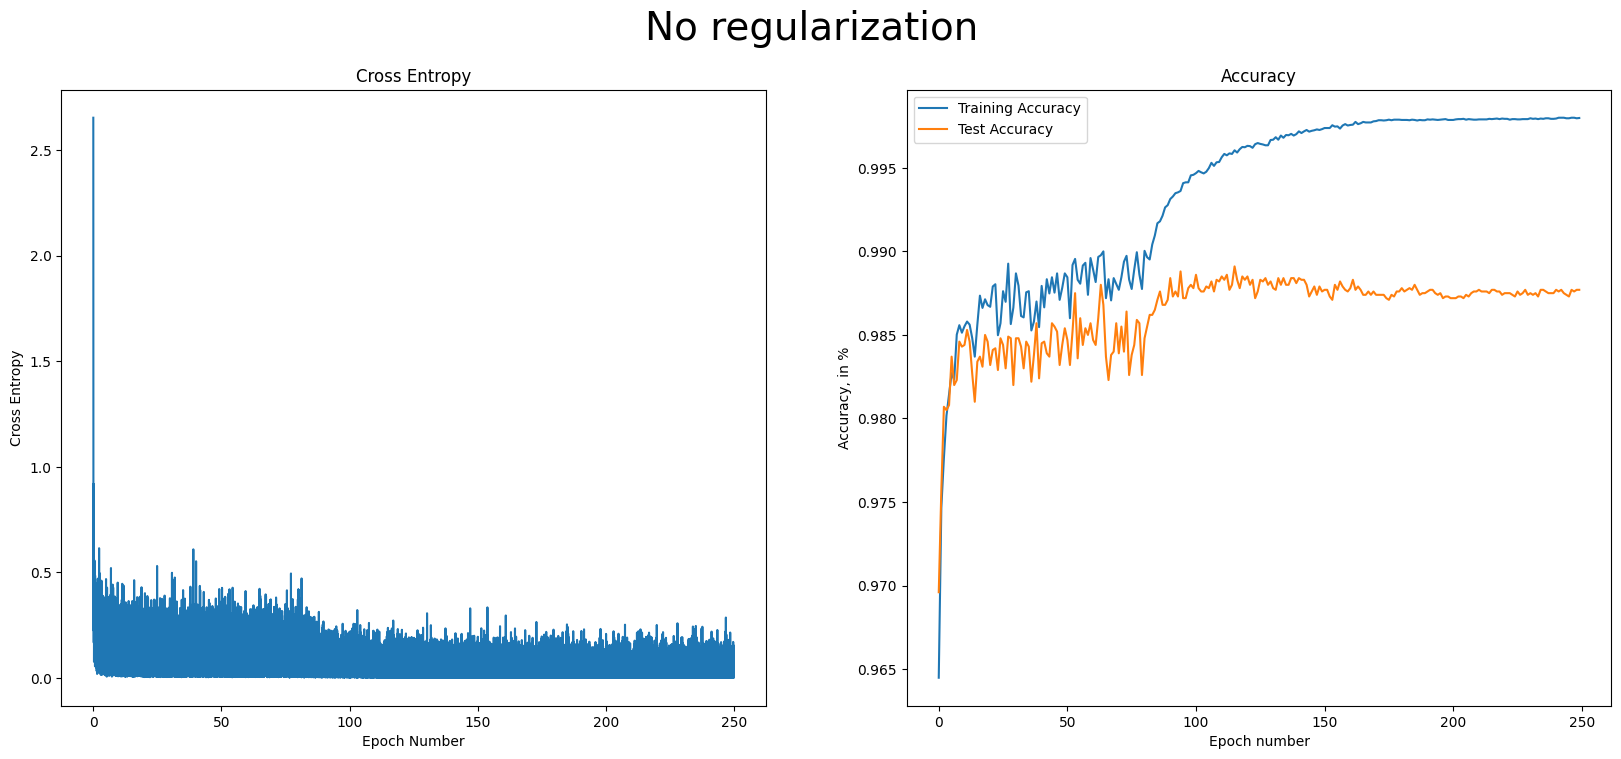

In [4]:
plot_results(models, model_name="model_no_reg_0", title="No regularization")

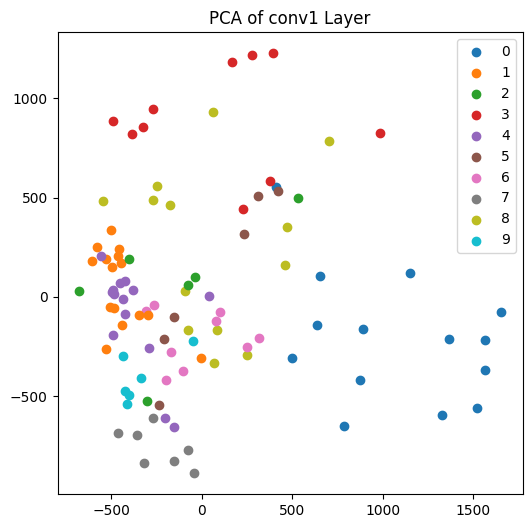

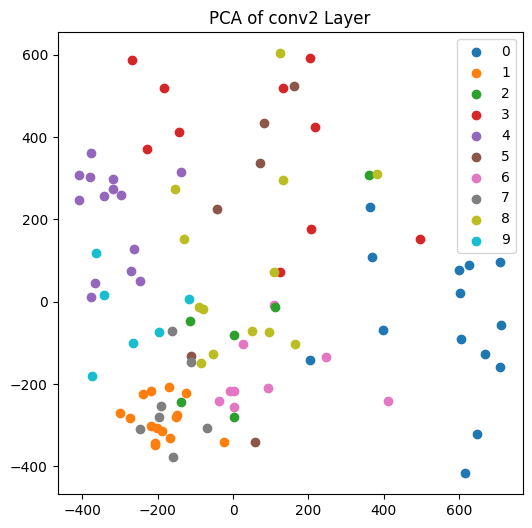

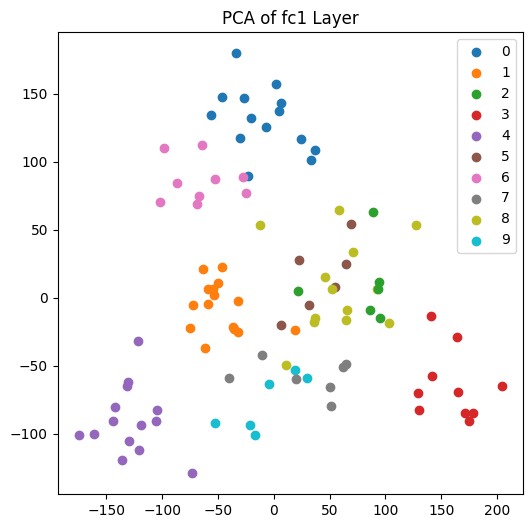

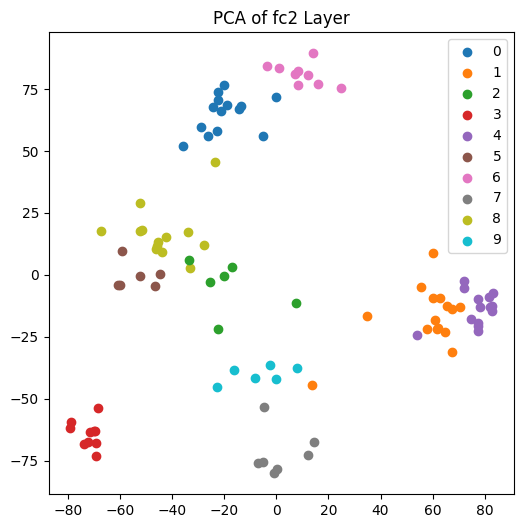

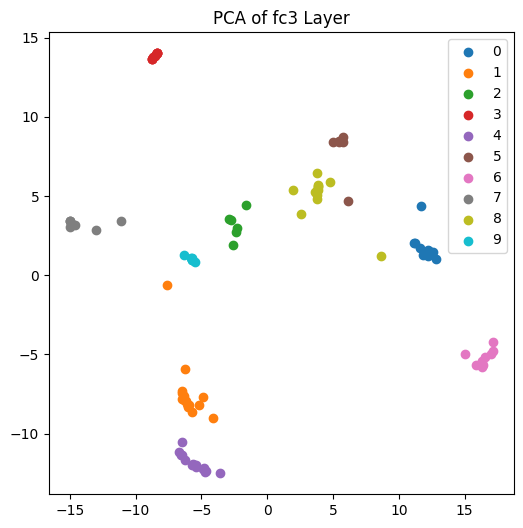

In [5]:
plot_activations_pca(models["model_no_reg_0"].model, train_loader, device)

Prediction with no regularization: 7


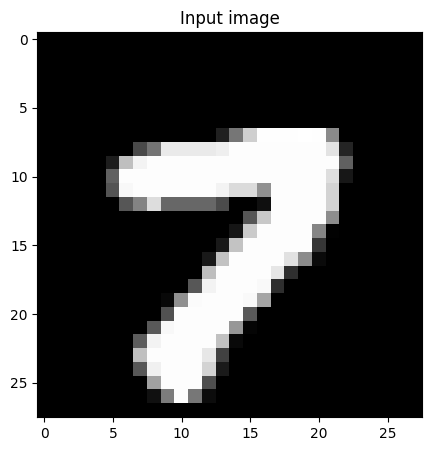

c:\ProgramData\Anaconda3\envs\bioai\Lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


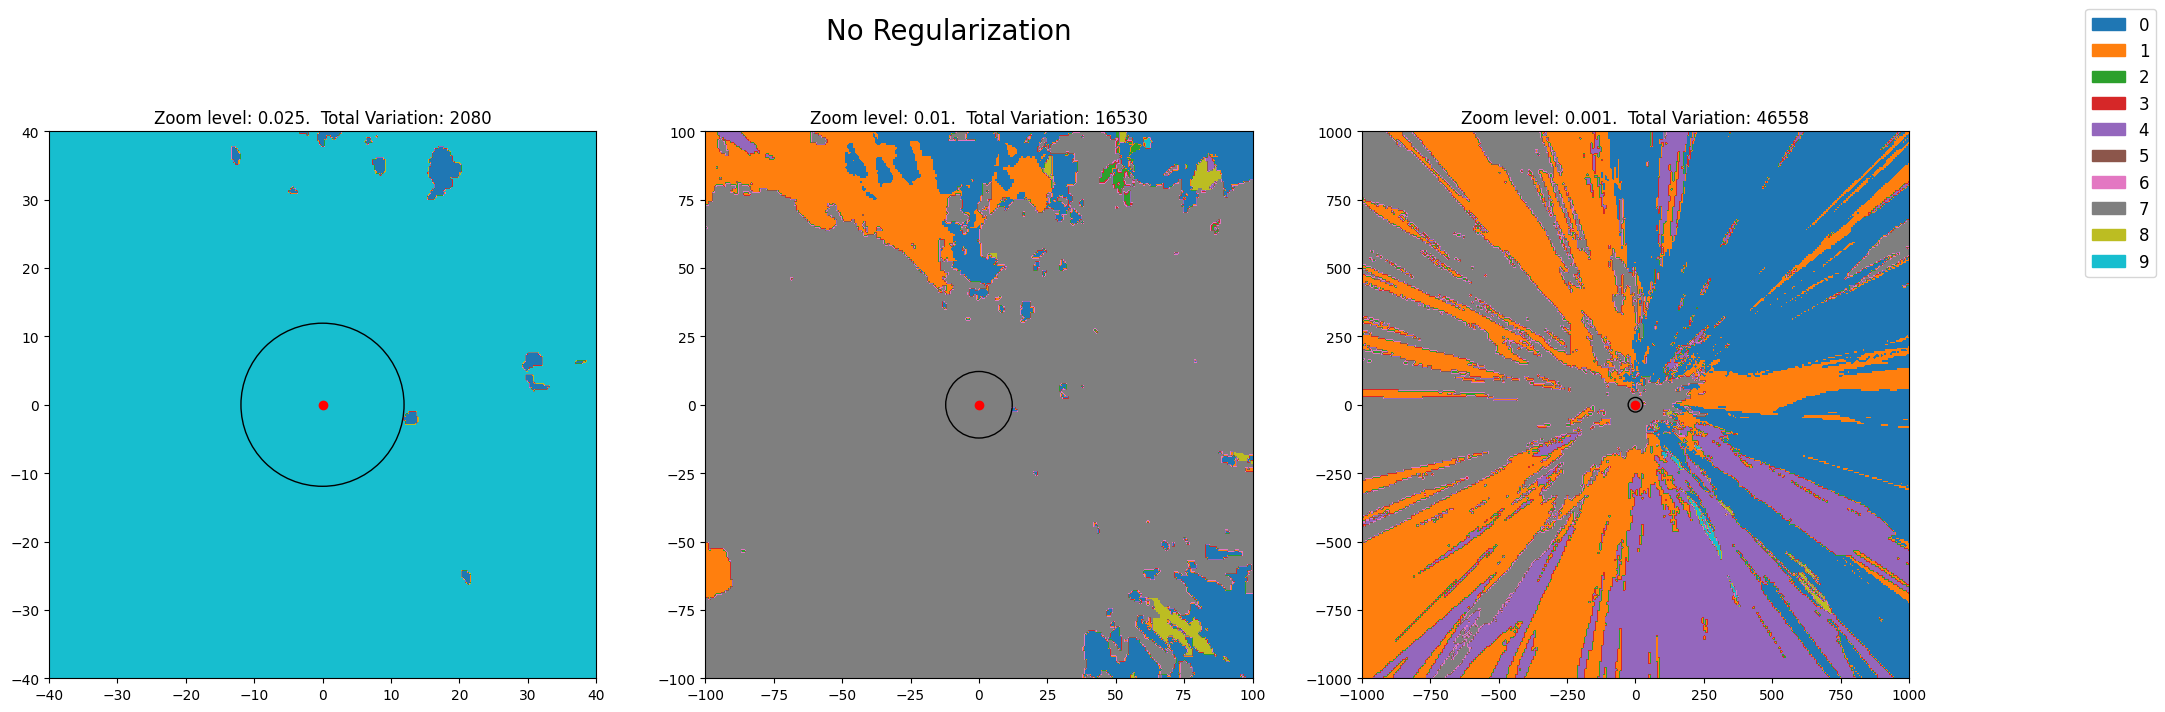

In [6]:
image = get_random_img(test_loader)
v1, v2 = generate_random_vectors(image)
plot_and_print_img(image, models["model_no_reg_0"].model, device, "no regularization")
plot_decision_boundary(
    models["model_no_reg_0"].model, image, v1, v2, device, title="No Regularization"
)

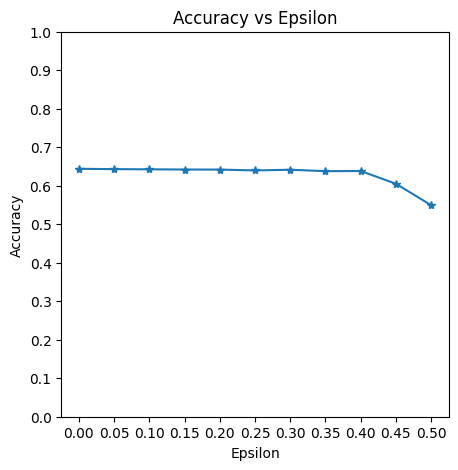

In [7]:
plot_fgsm(models["model_no_reg_0"].model, device, test_loader)

### No Regularization, No Dropout

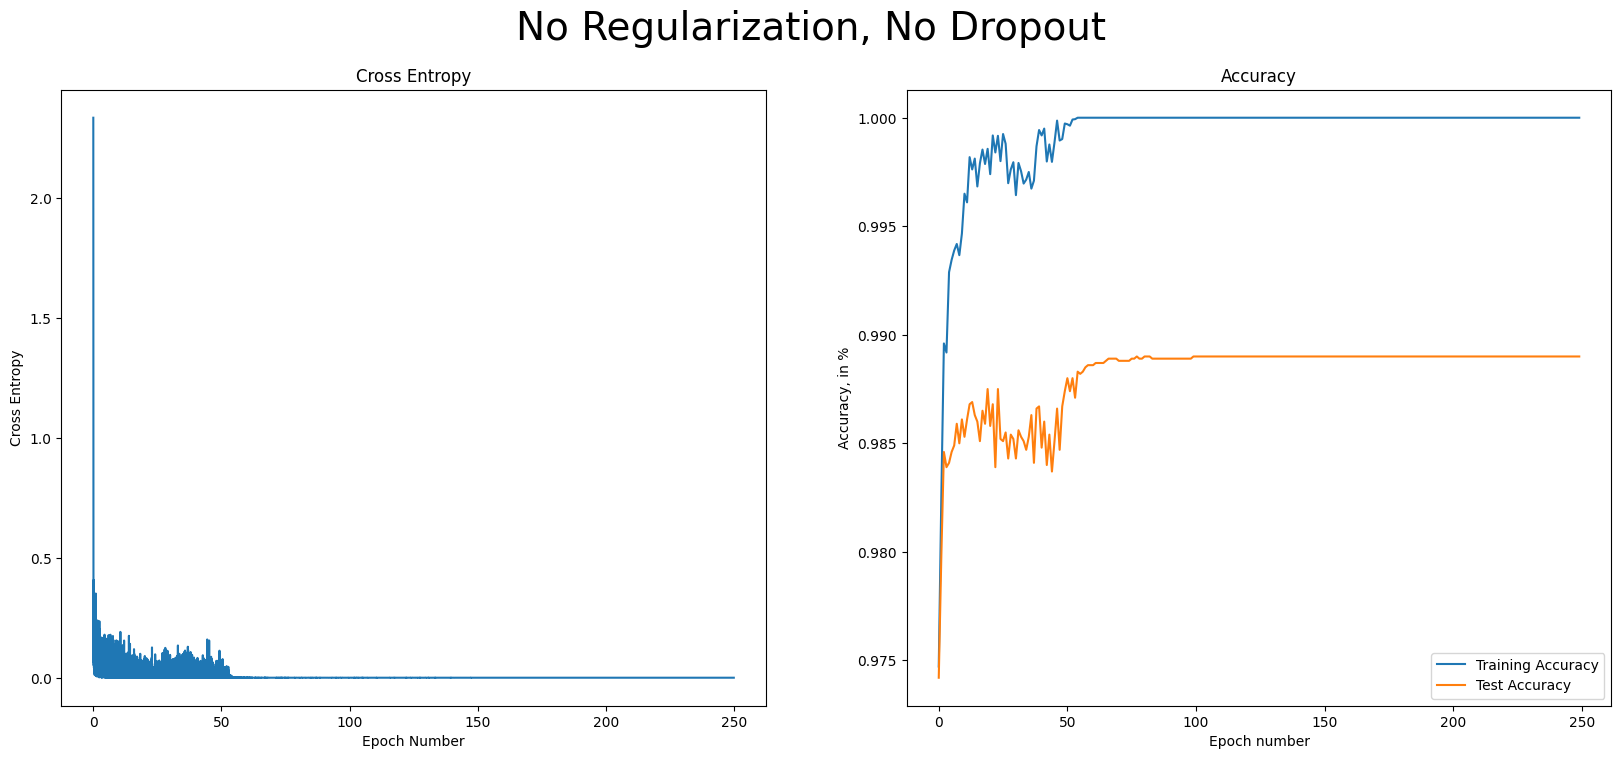

In [8]:
plot_results(
    models,
    model_name="model_no_reg_no_dropout_0",
    title="No Regularization, No Dropout",
)

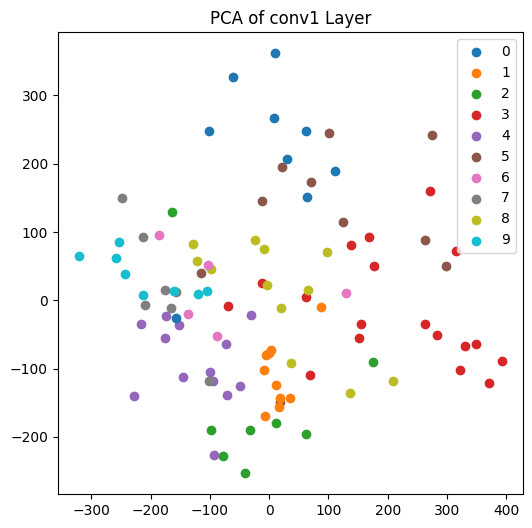

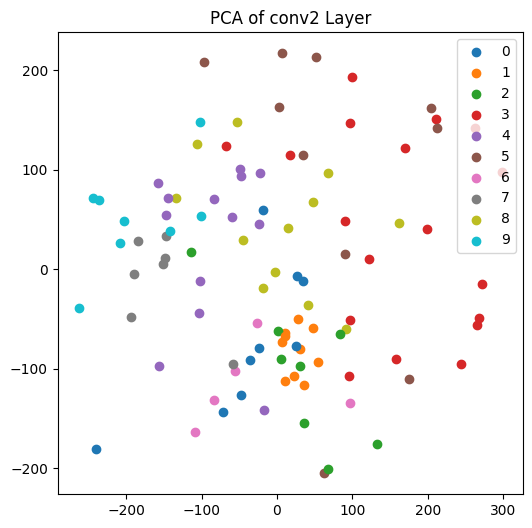

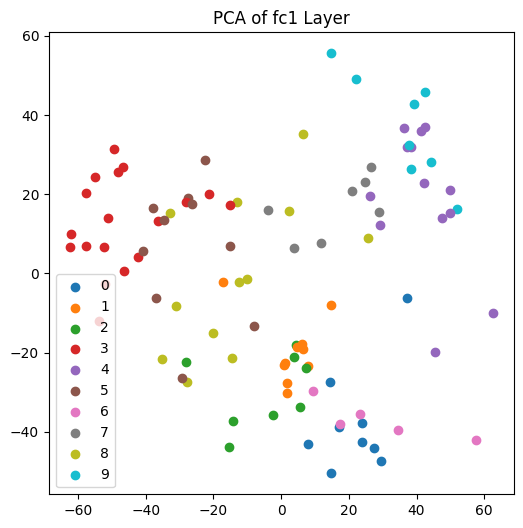

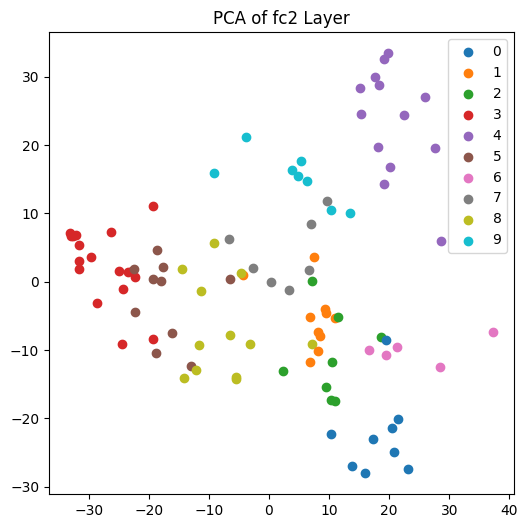

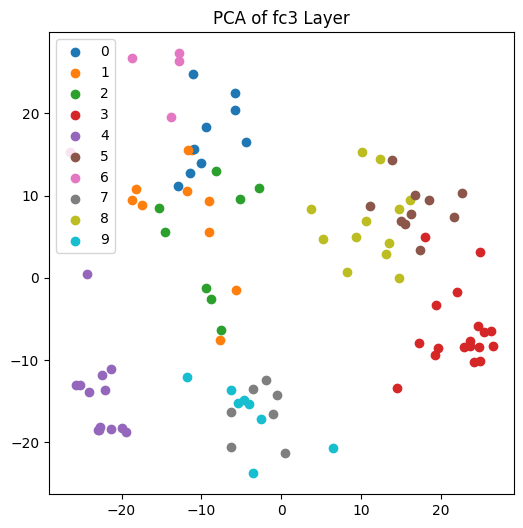

In [9]:
plot_activations_pca(models["model_no_reg_no_dropout_0"].model, train_loader, device)

Prediction with no regularization, no dropout: 1


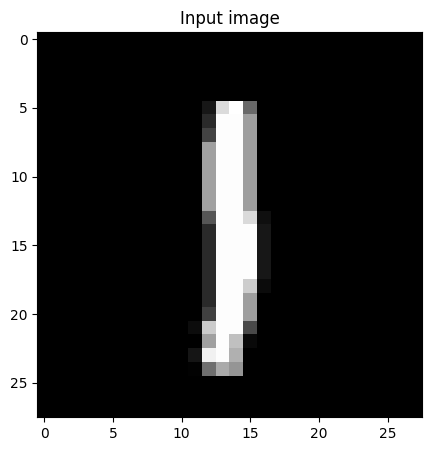

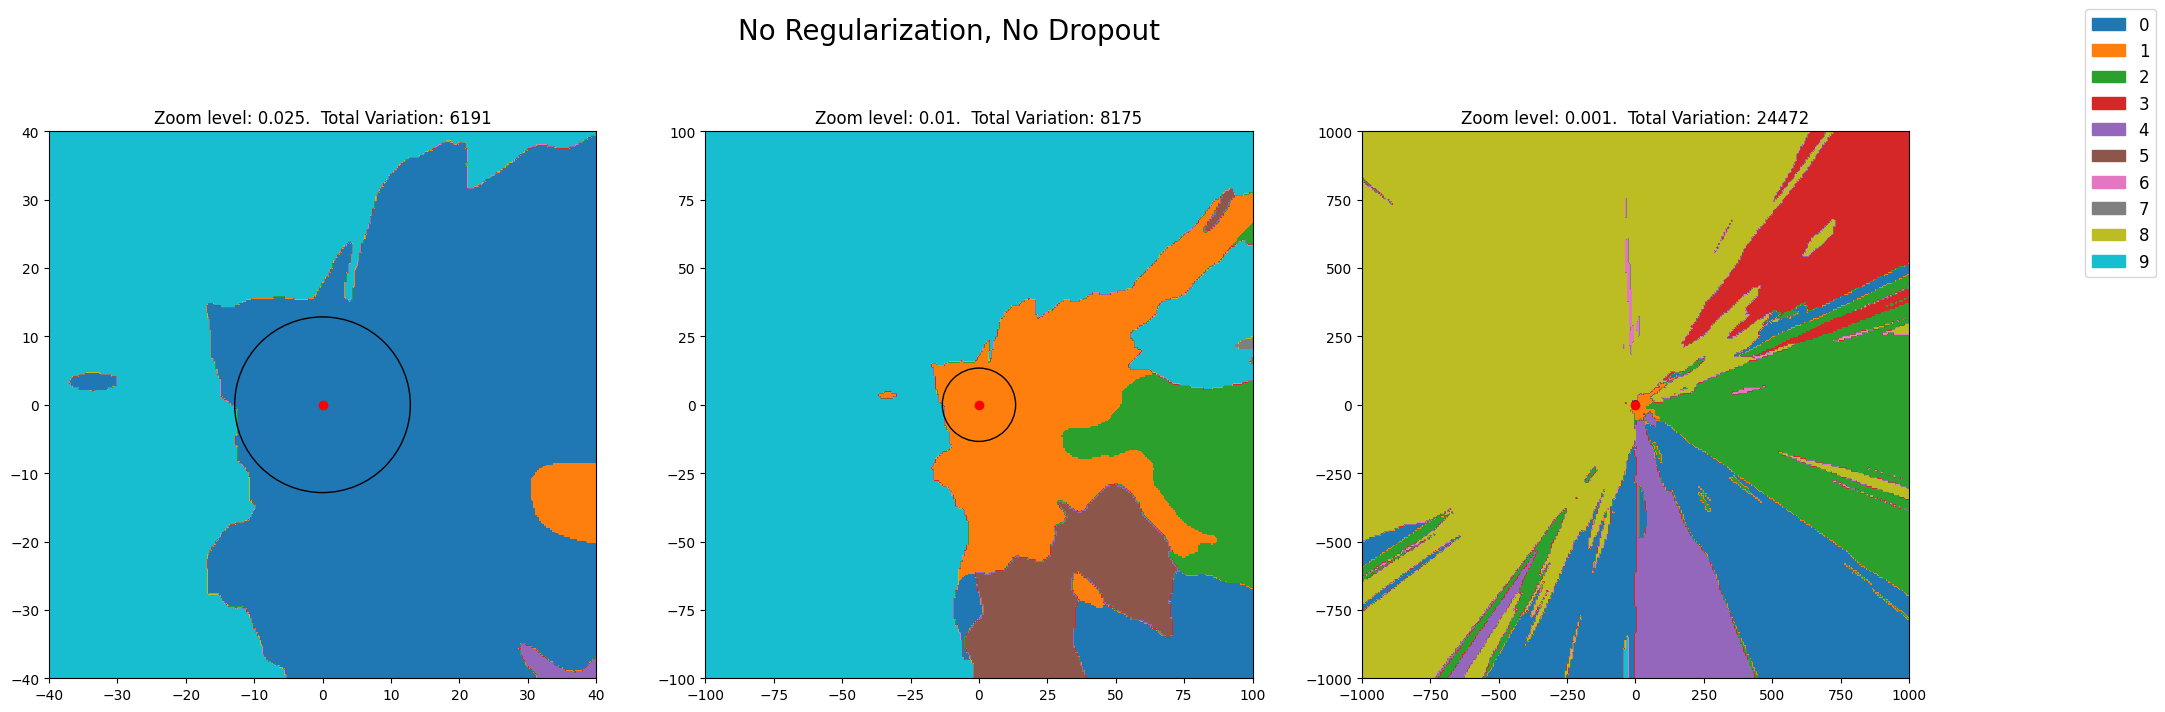

In [10]:
image = get_random_img(test_loader)
v1, v2 = generate_random_vectors(image)
plot_and_print_img(
    image,
    models["model_no_reg_no_dropout_0"].model,
    device,
    "no regularization, no dropout",
)
plot_decision_boundary(
    models["model_no_reg_no_dropout_0"].model,
    image,
    v1,
    v2,
    device,
    title="No Regularization, No Dropout",
)

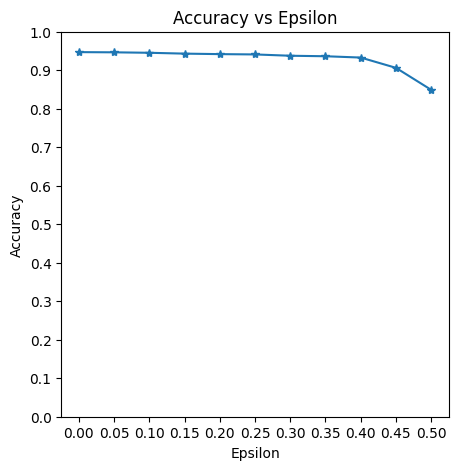

In [11]:
plot_fgsm(models["model_no_reg_no_dropout_0"].model, device, test_loader)

### L2 Regularization

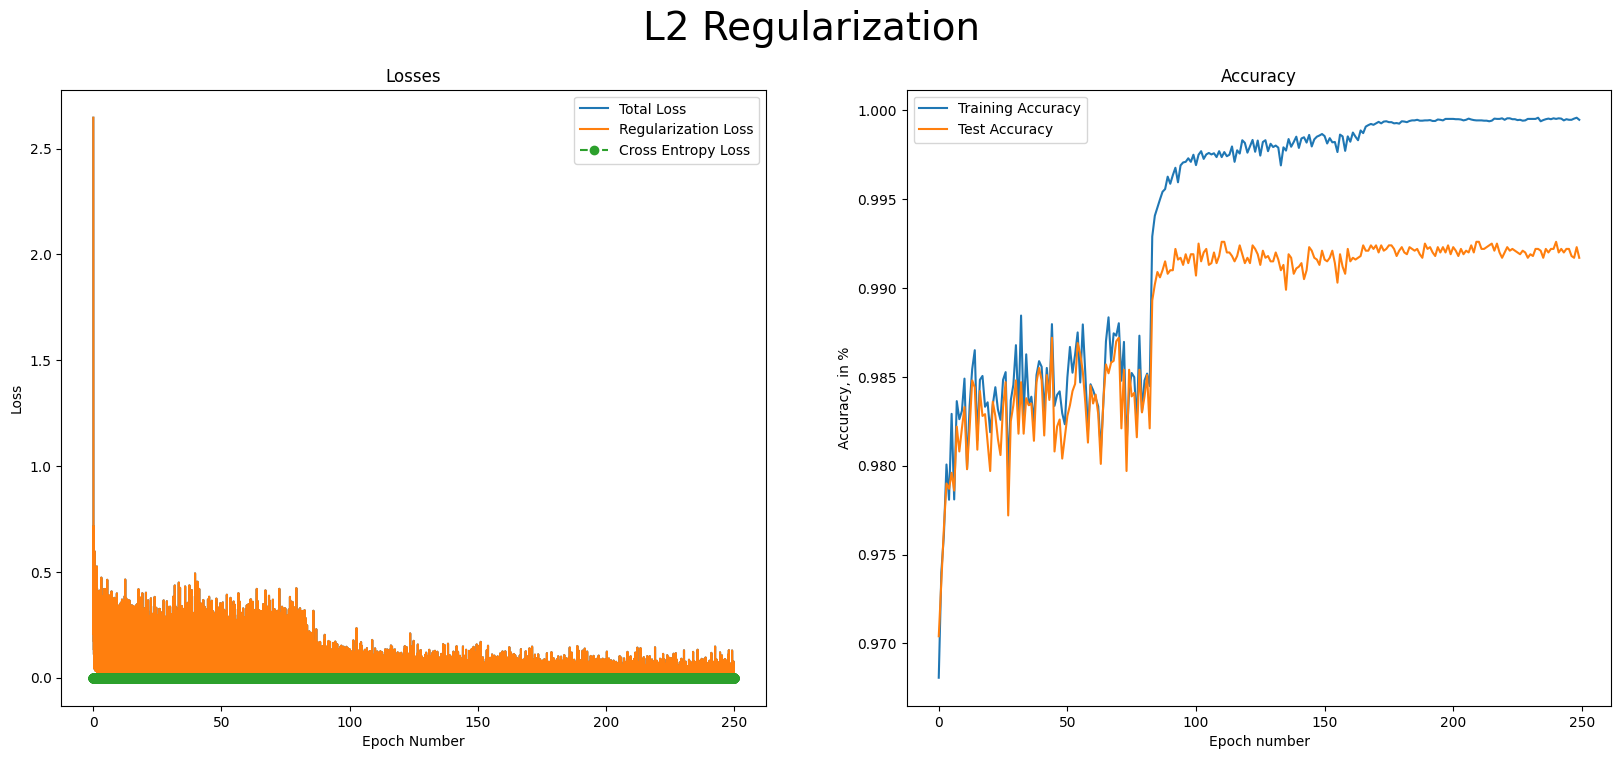

In [12]:
plot_reg_results(models, model_name="model_l2_0", title="L2 Regularization")

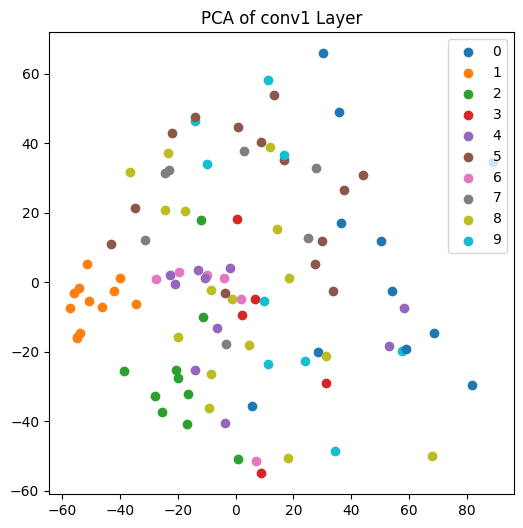

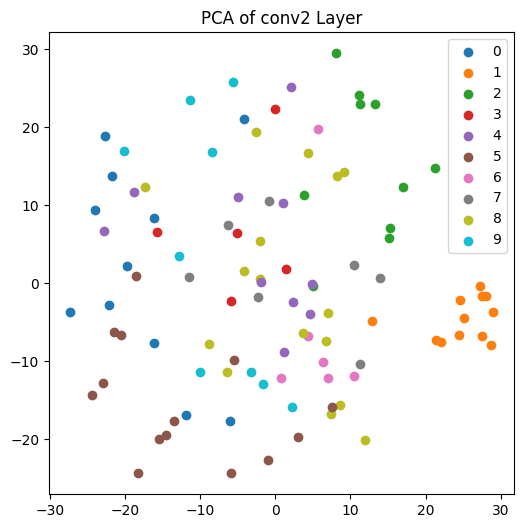

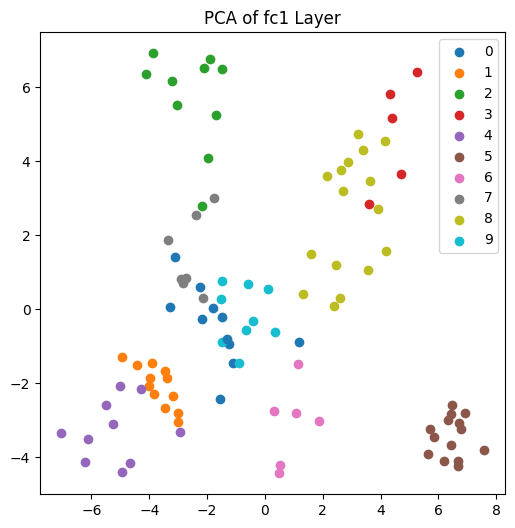

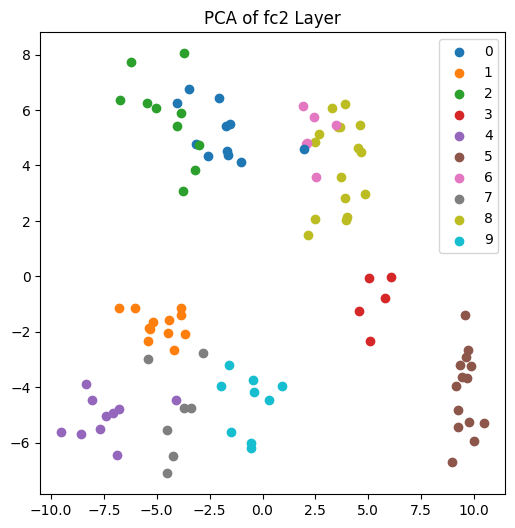

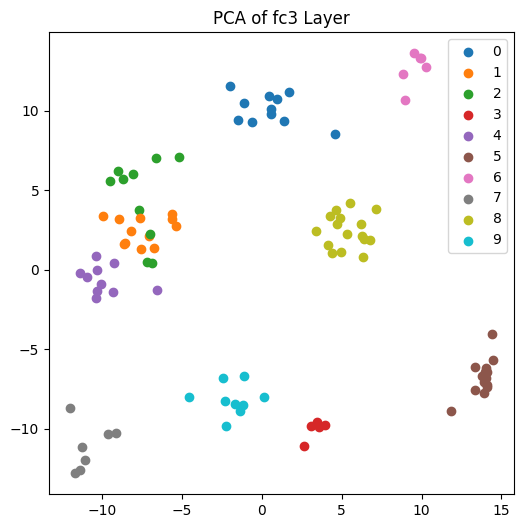

In [13]:
plot_activations_pca(models["model_l2_0"].model, train_loader, device)

Prediction with L2 regularization: 0


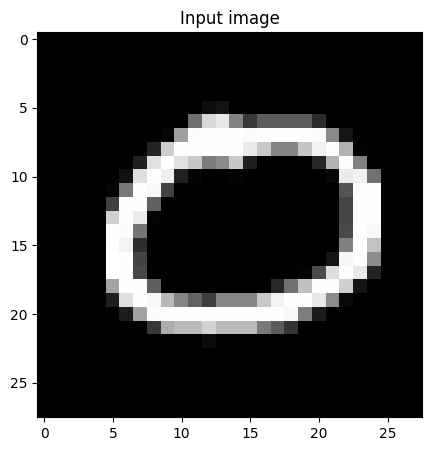

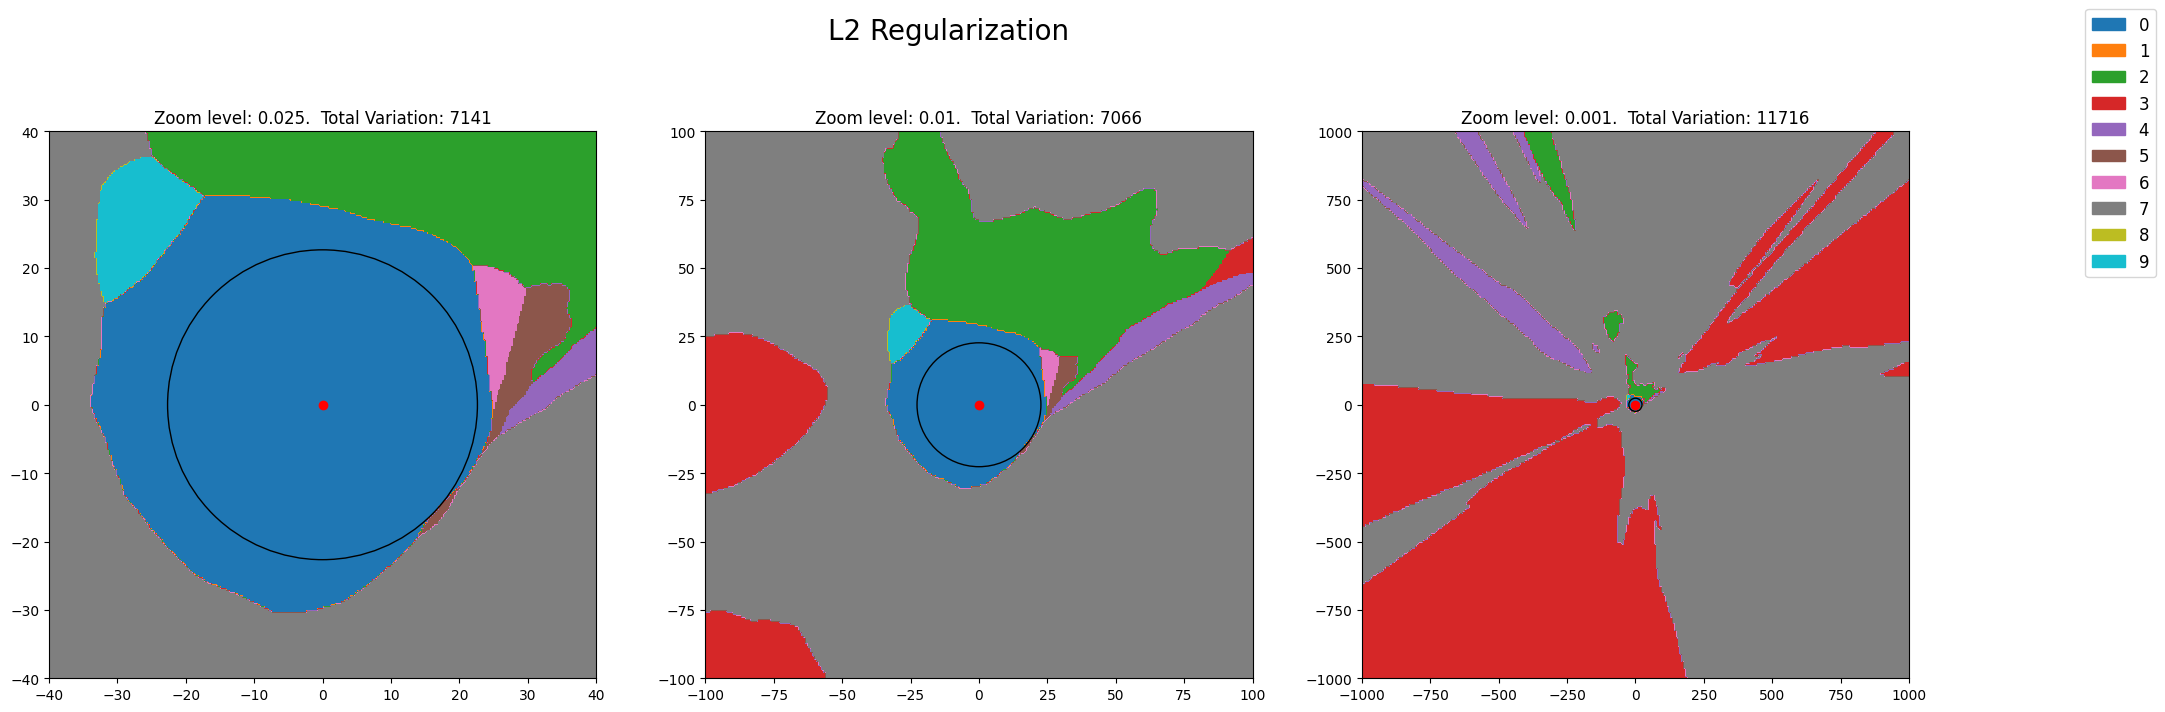

In [14]:
image = get_random_img(test_loader)
v1, v2 = generate_random_vectors(image)
plot_and_print_img(image, models["model_l2_0"].model, device, "L2 regularization")
plot_decision_boundary(
    models["model_l2_0"].model, image, v1, v2, device, title="L2 Regularization"
)

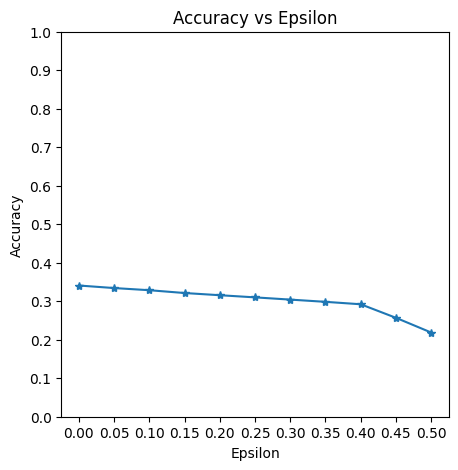

In [15]:
plot_fgsm(models["model_l2_0"].model, device, test_loader)

### L2 Regularization, No Dropout

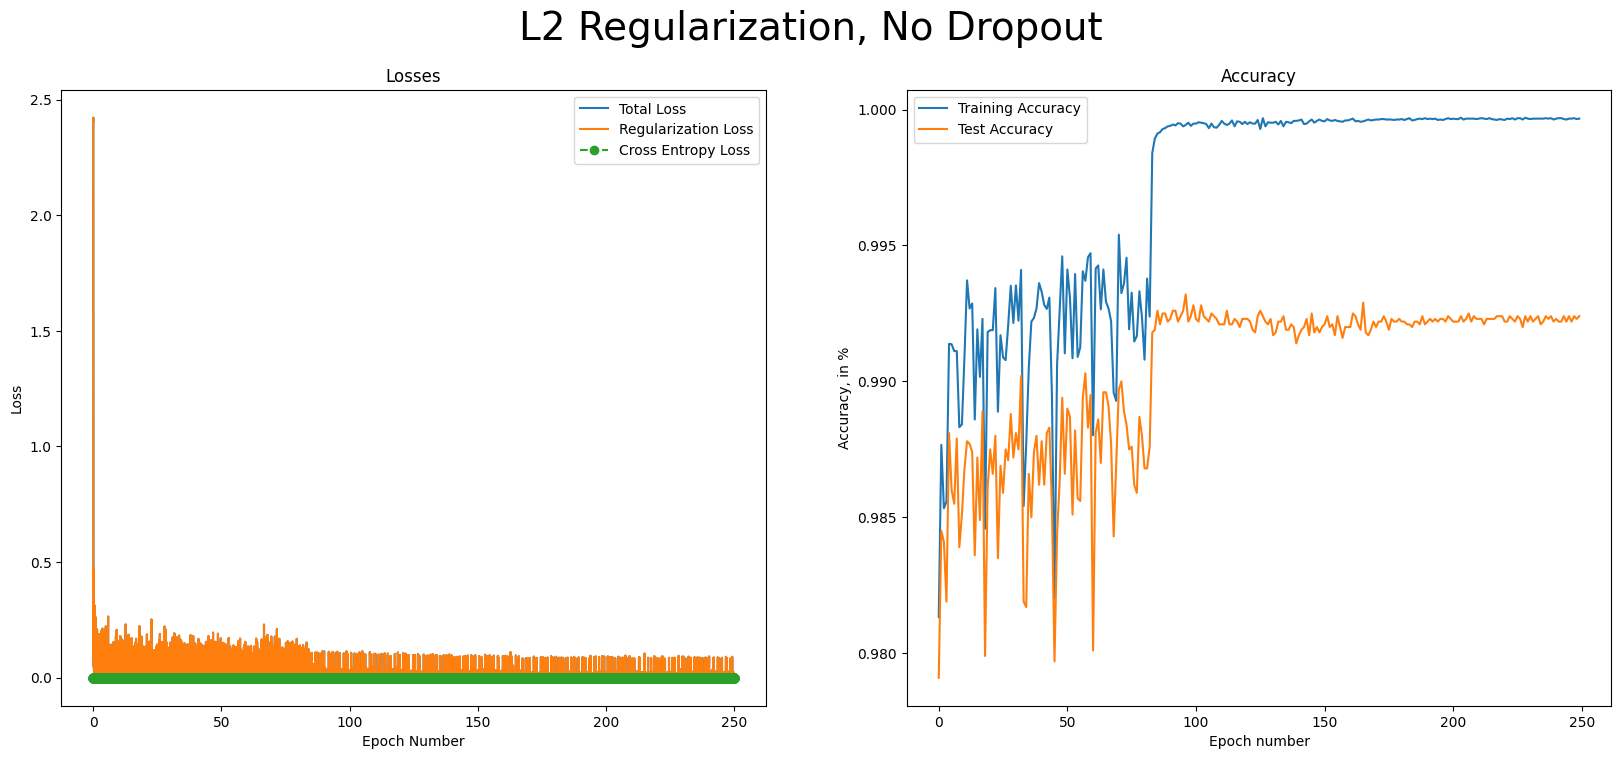

In [16]:
plot_reg_results(
    models, model_name="model_l2_no_dropout_0", title="L2 Regularization, No Dropout"
)

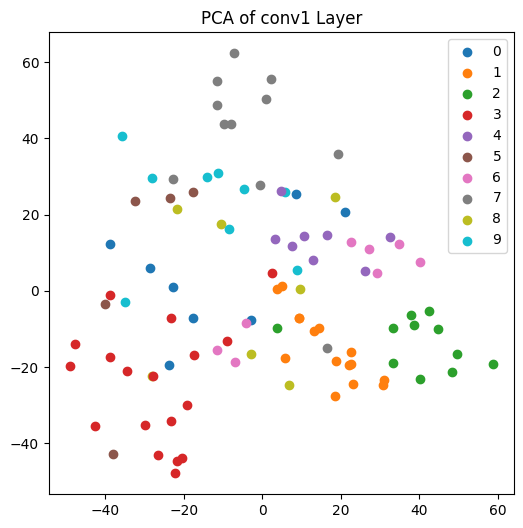

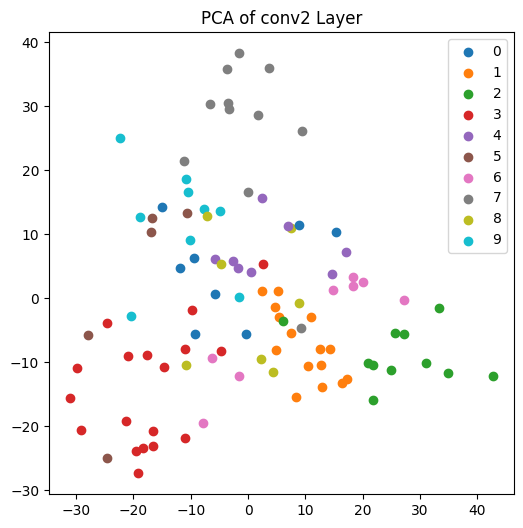

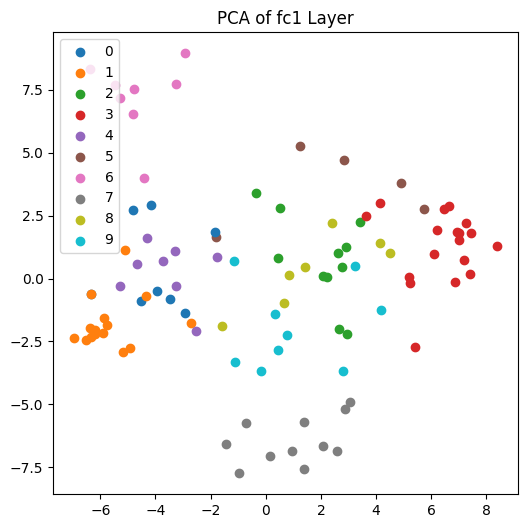

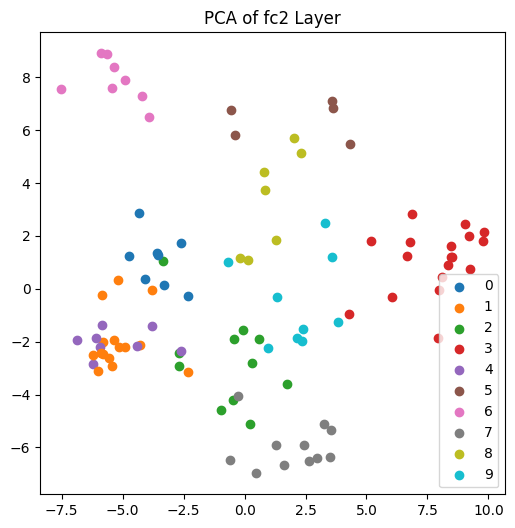

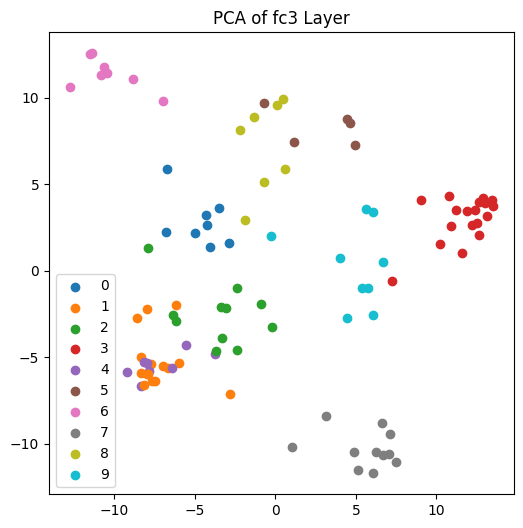

In [17]:
plot_activations_pca(models["model_l2_no_dropout_0"].model, train_loader, device)

Prediction with L2 regularization, no dropout: 4


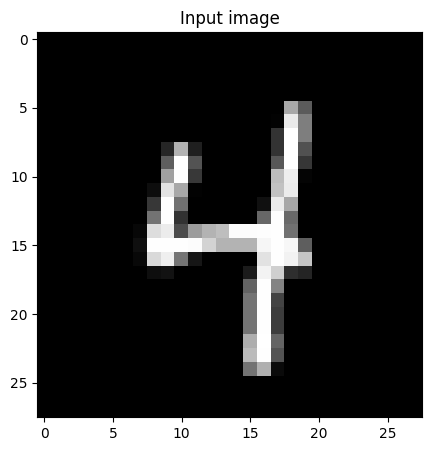

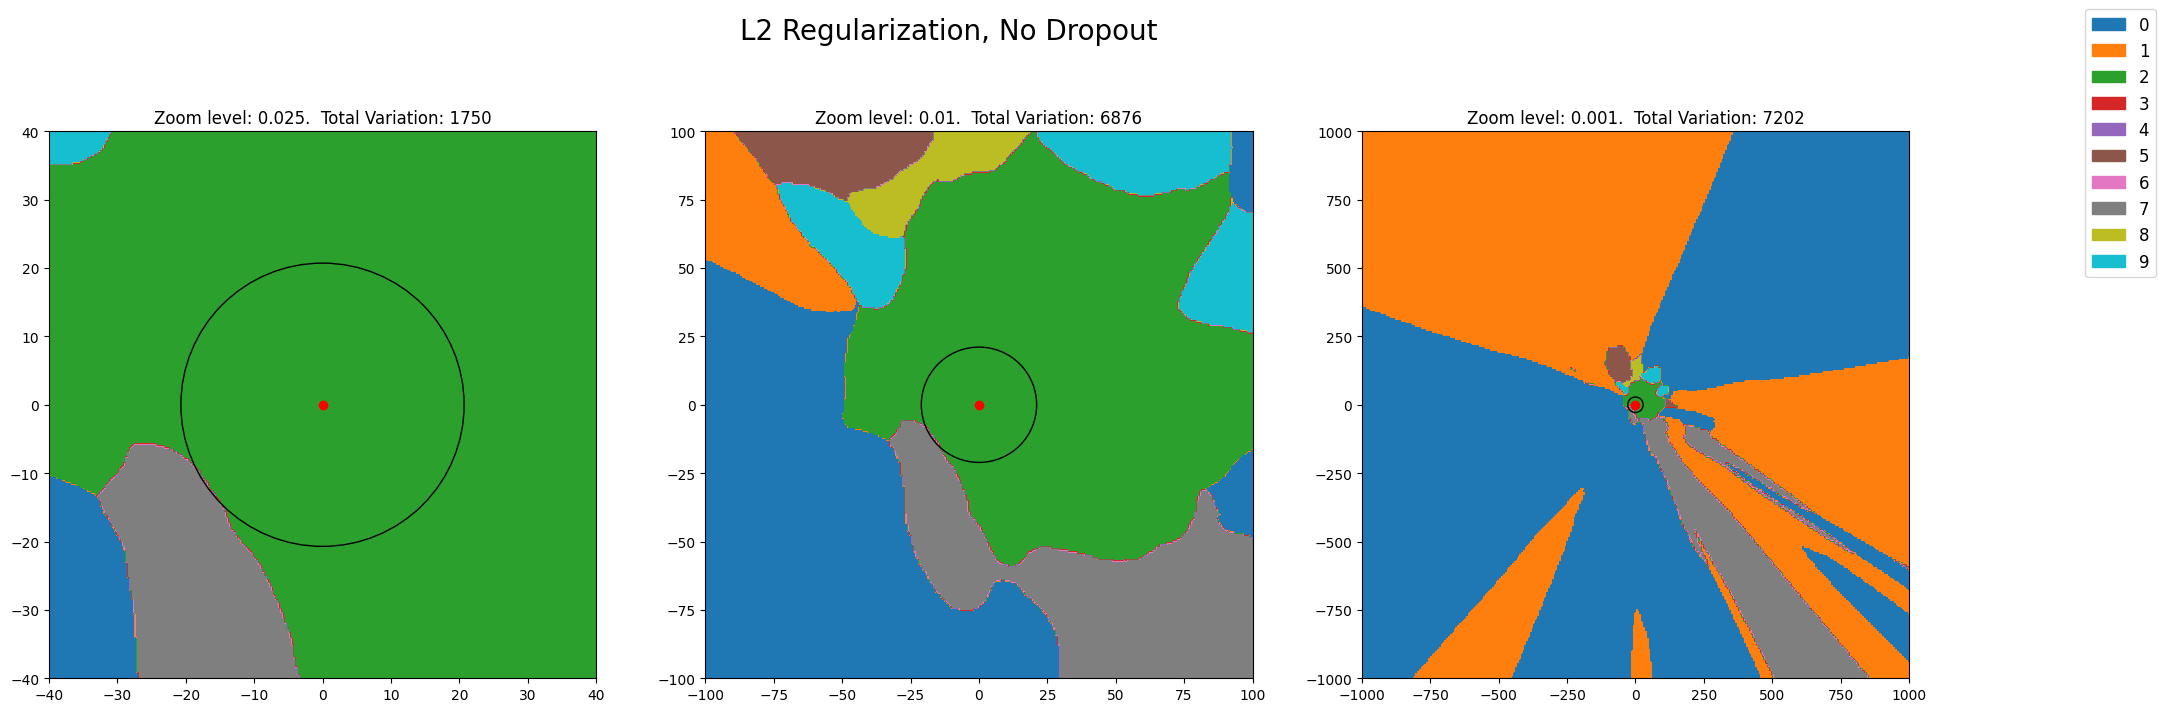

In [18]:
image = get_random_img(test_loader)
v1, v2 = generate_random_vectors(image)
plot_and_print_img(
    image,
    models["model_l2_no_dropout_0"].model,
    device,
    "L2 regularization, no dropout",
)
plot_decision_boundary(
    models["model_l2_no_dropout_0"].model,
    image,
    v1,
    v2,
    device,
    title="L2 Regularization, No Dropout",
)

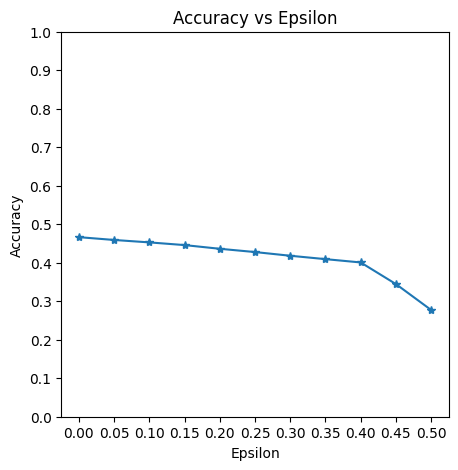

In [19]:
plot_fgsm(models["model_l2_no_dropout_0"].model, device, test_loader)

### Jacobian Regularization

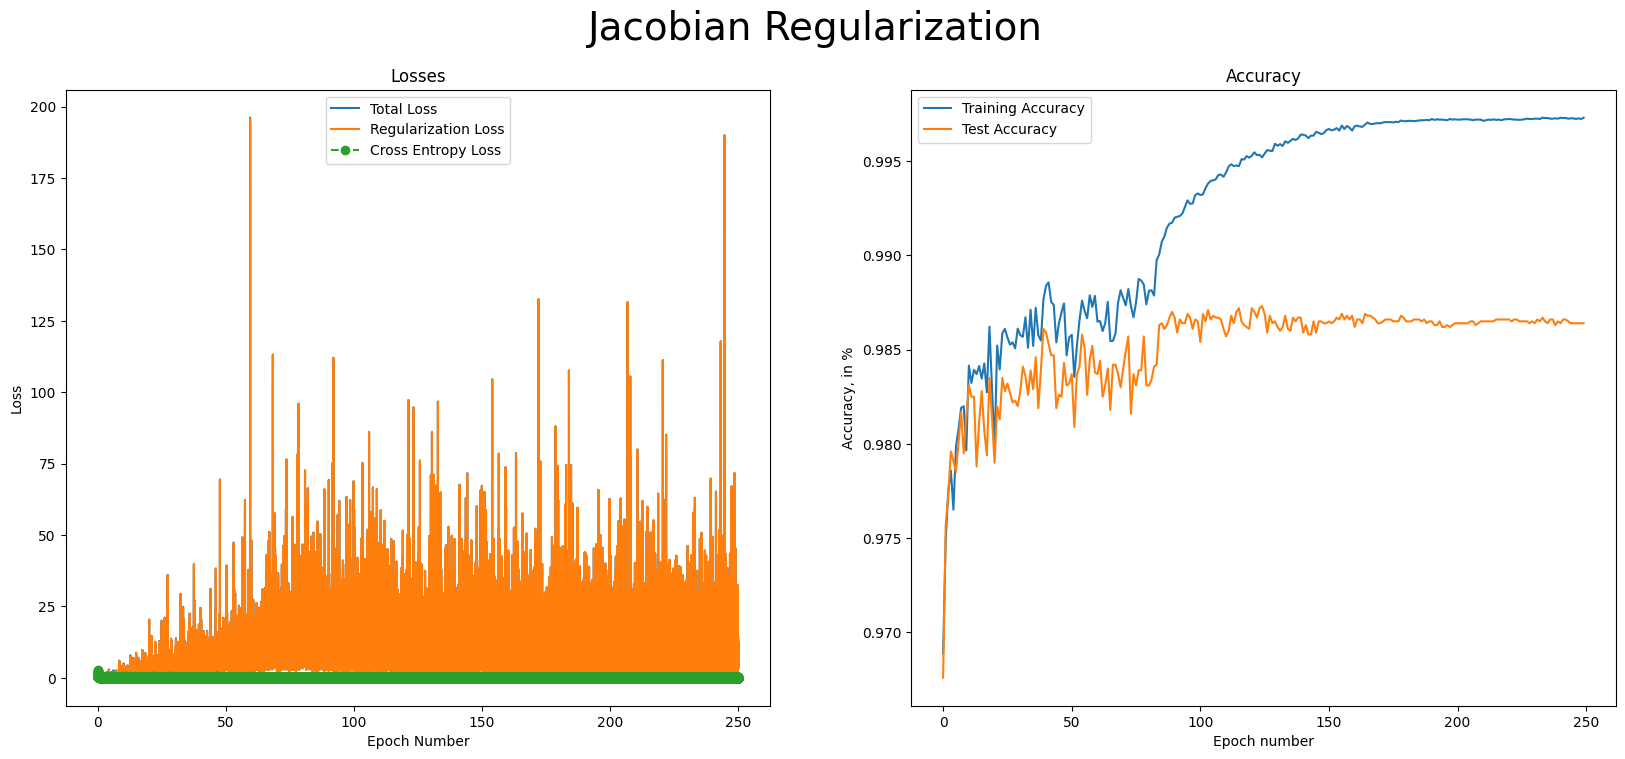

In [20]:
plot_reg_results(models, model_name="model_jacobi_0", title="Jacobian Regularization")

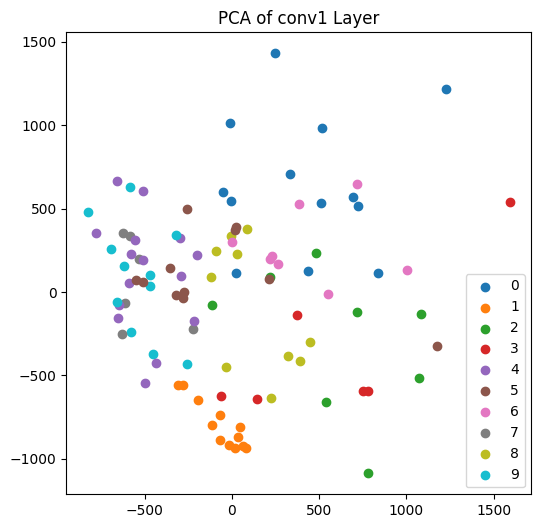

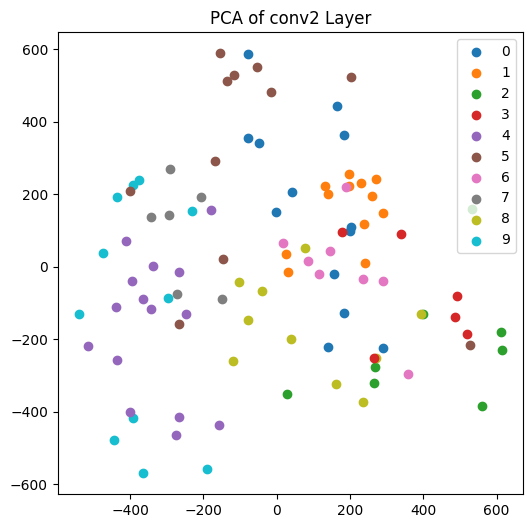

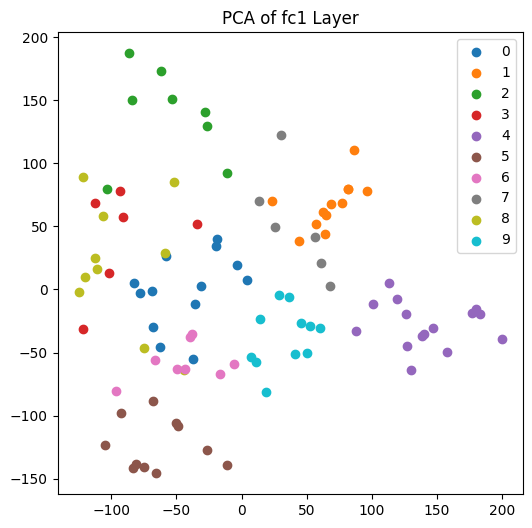

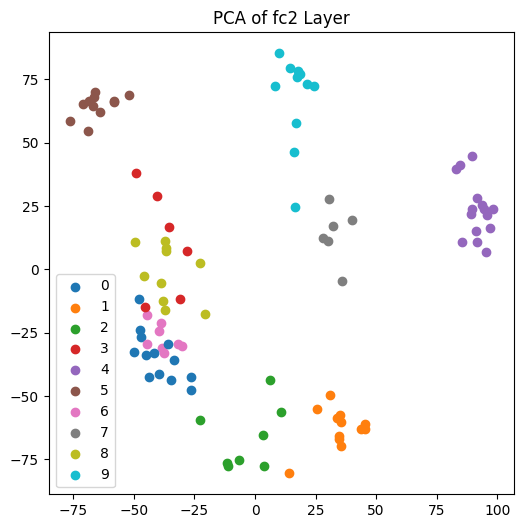

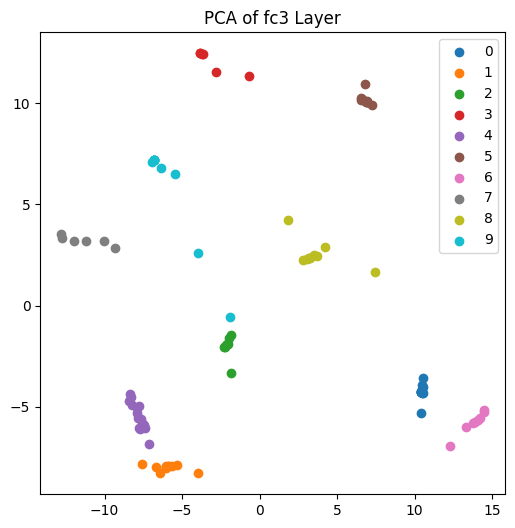

In [21]:
plot_activations_pca(models["model_jacobi_0"].model, train_loader, device)

Prediction with jacobian regularization: 4


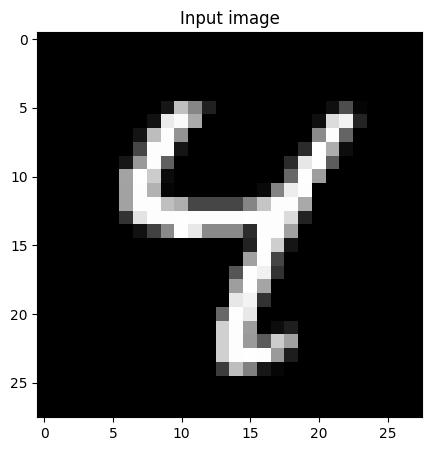

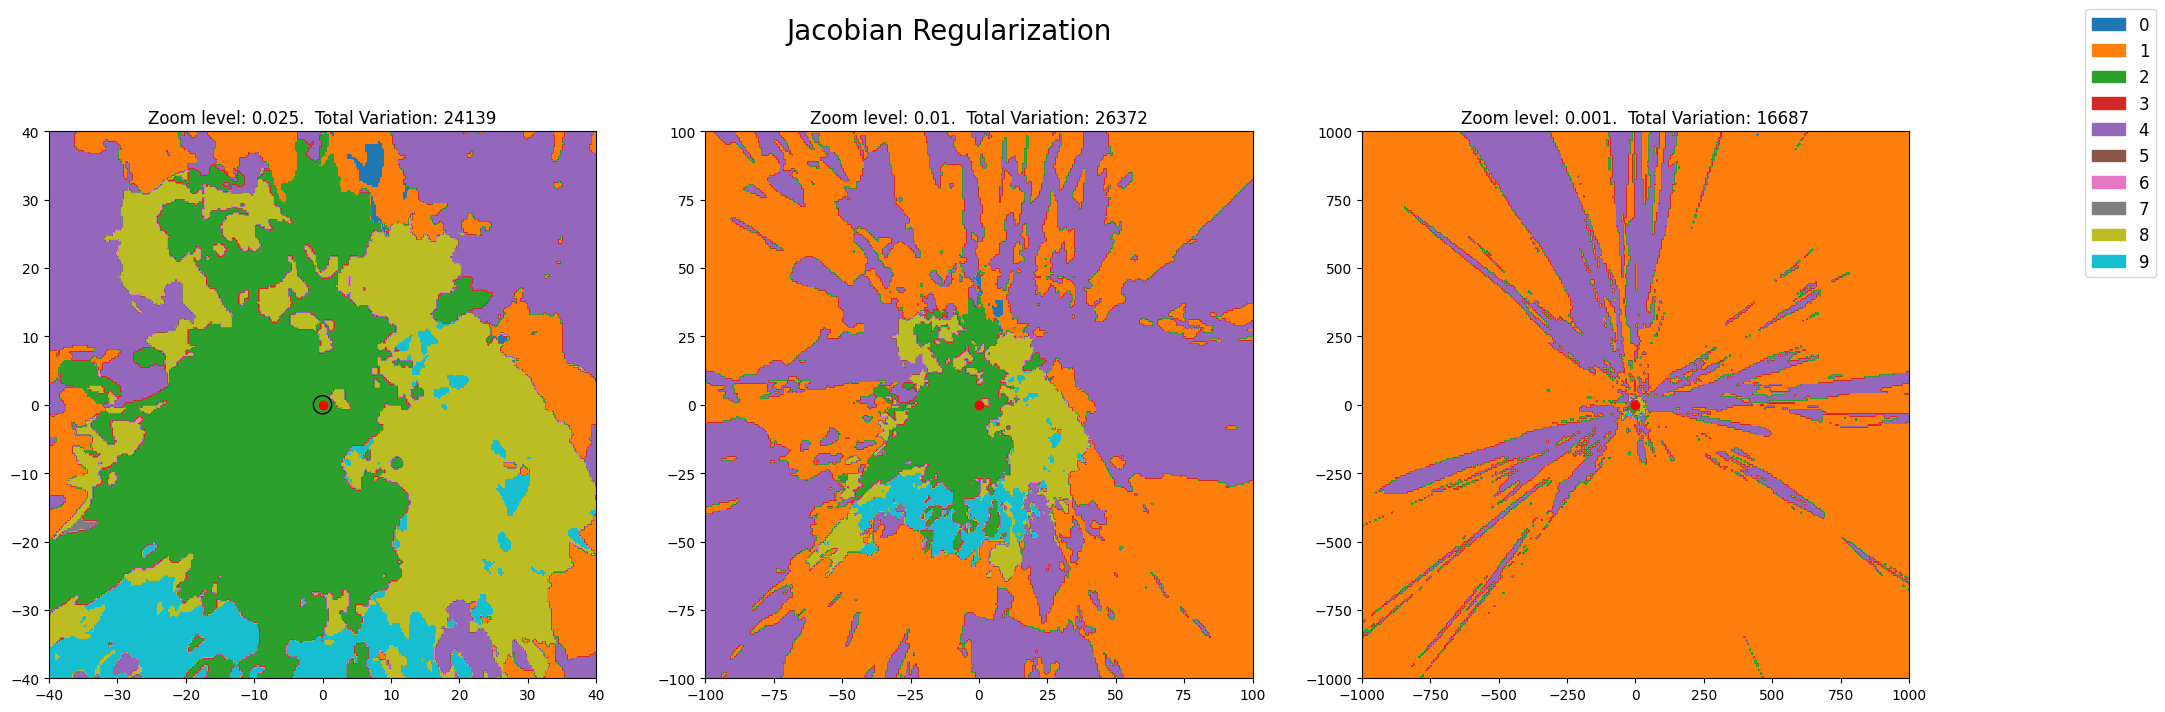

In [22]:
image = get_random_img(test_loader)
v1, v2 = generate_random_vectors(image)
plot_and_print_img(
    image, models["model_jacobi_0"].model, device, "jacobian regularization"
)
plot_decision_boundary(
    models["model_jacobi_0"].model,
    image,
    v1,
    v2,
    device,
    title="Jacobian Regularization",
)

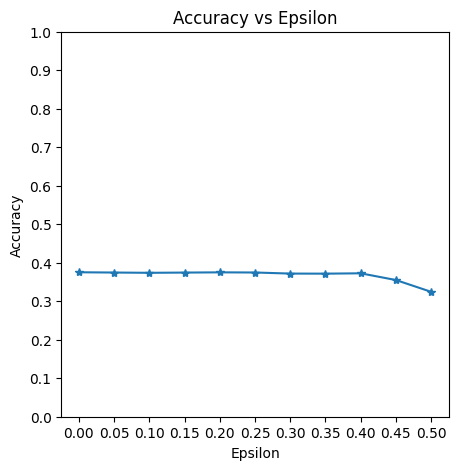

In [23]:
plot_fgsm(models["model_jacobi_0"].model, device, test_loader)

### Jacobian Regularization, No Dropout

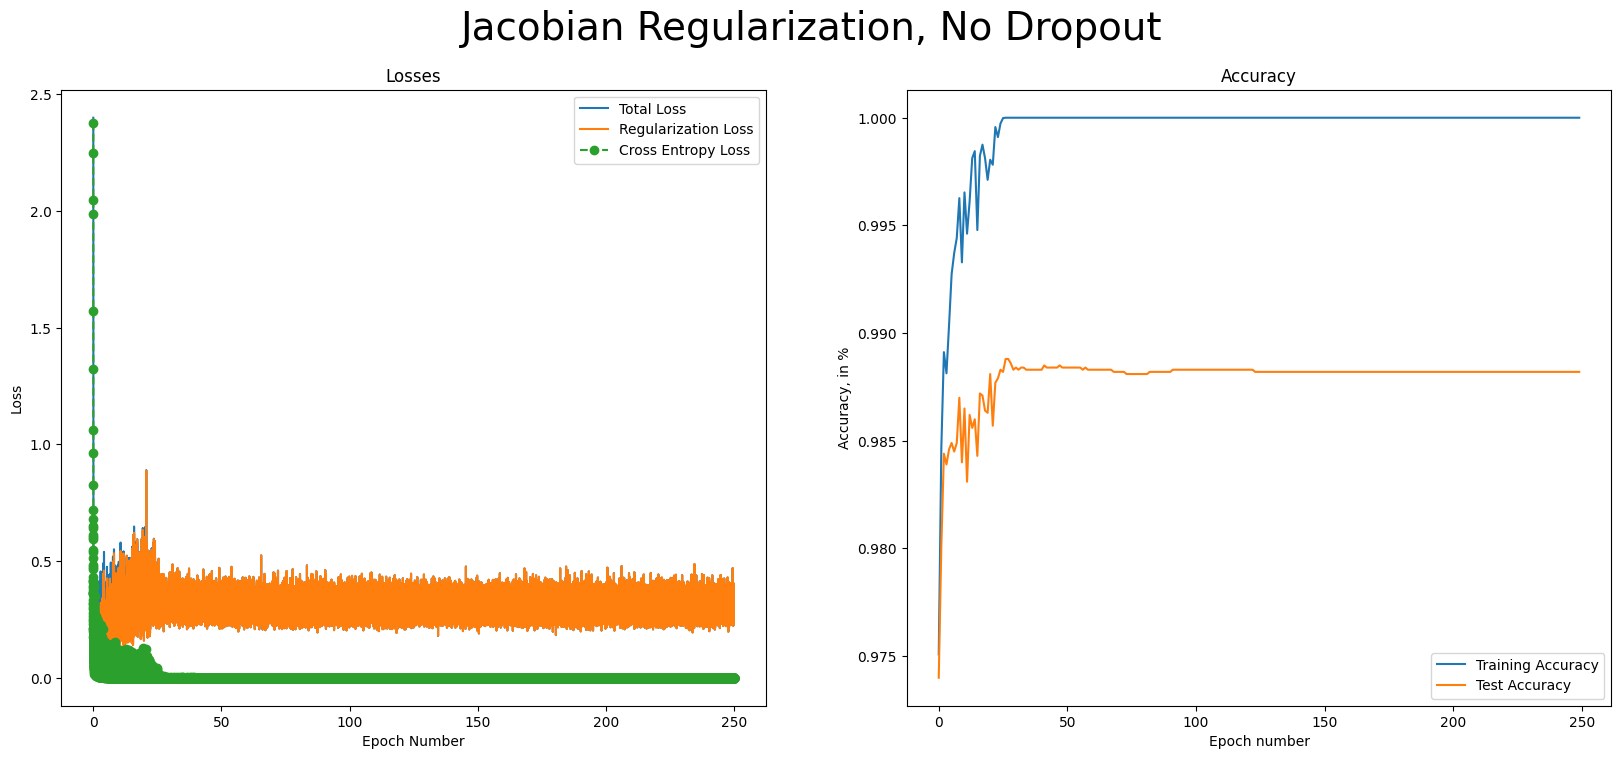

In [24]:
plot_reg_results(
    models,
    model_name="model_jacobi_no_dropout_0",
    title="Jacobian Regularization, No Dropout",
)

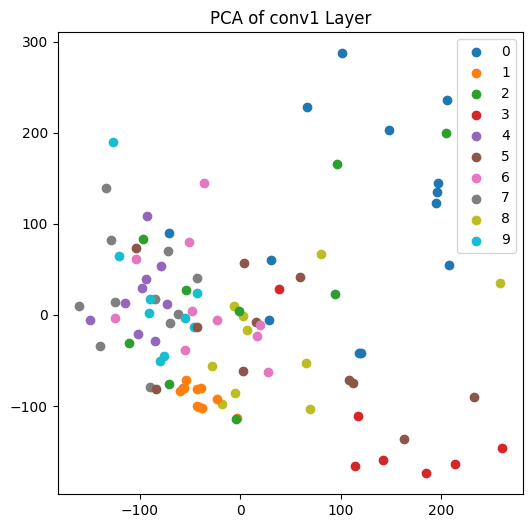

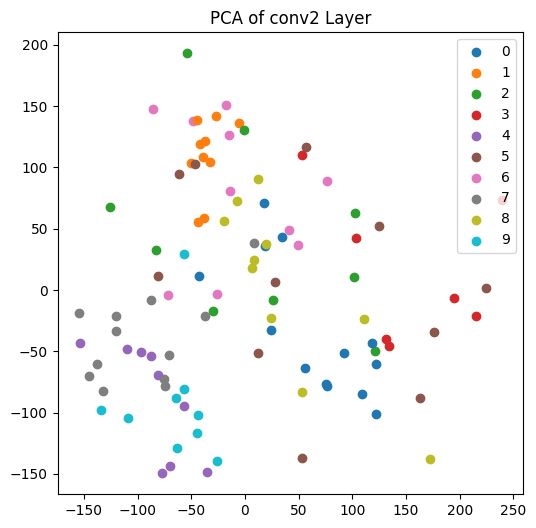

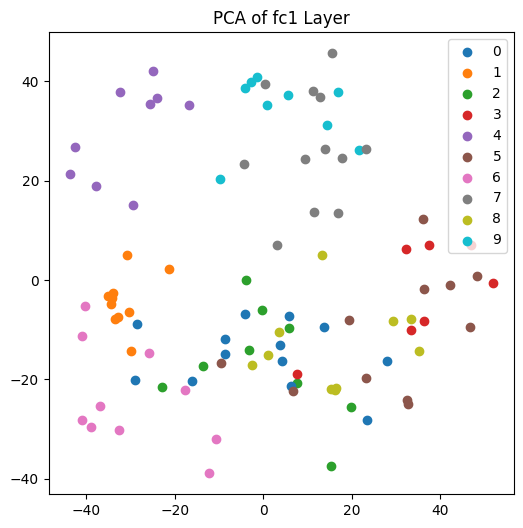

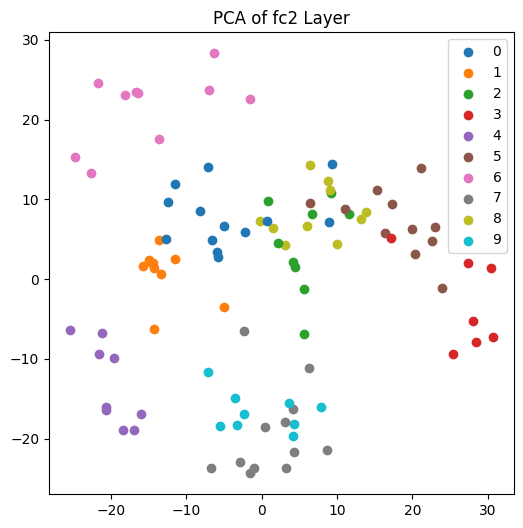

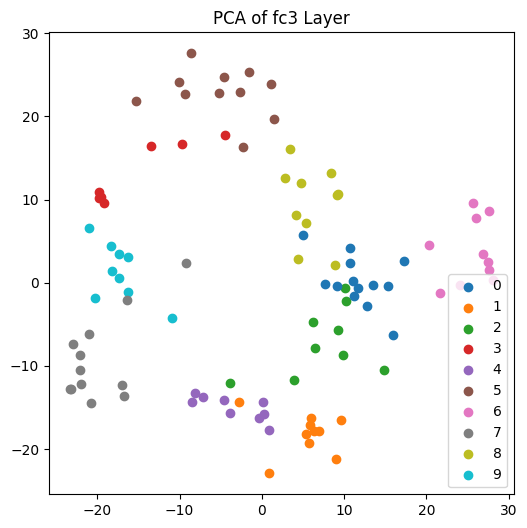

In [25]:
plot_activations_pca(models["model_jacobi_no_dropout_0"].model, train_loader, device)

Prediction with jacobian regularization, no dropout: 6


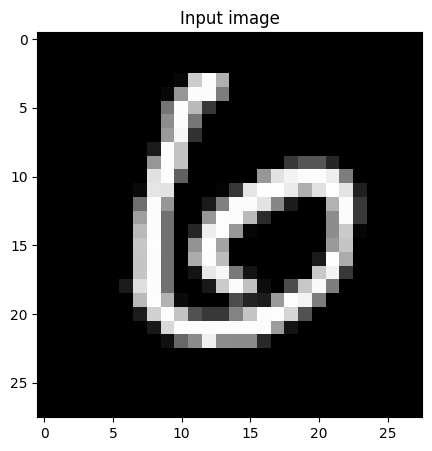

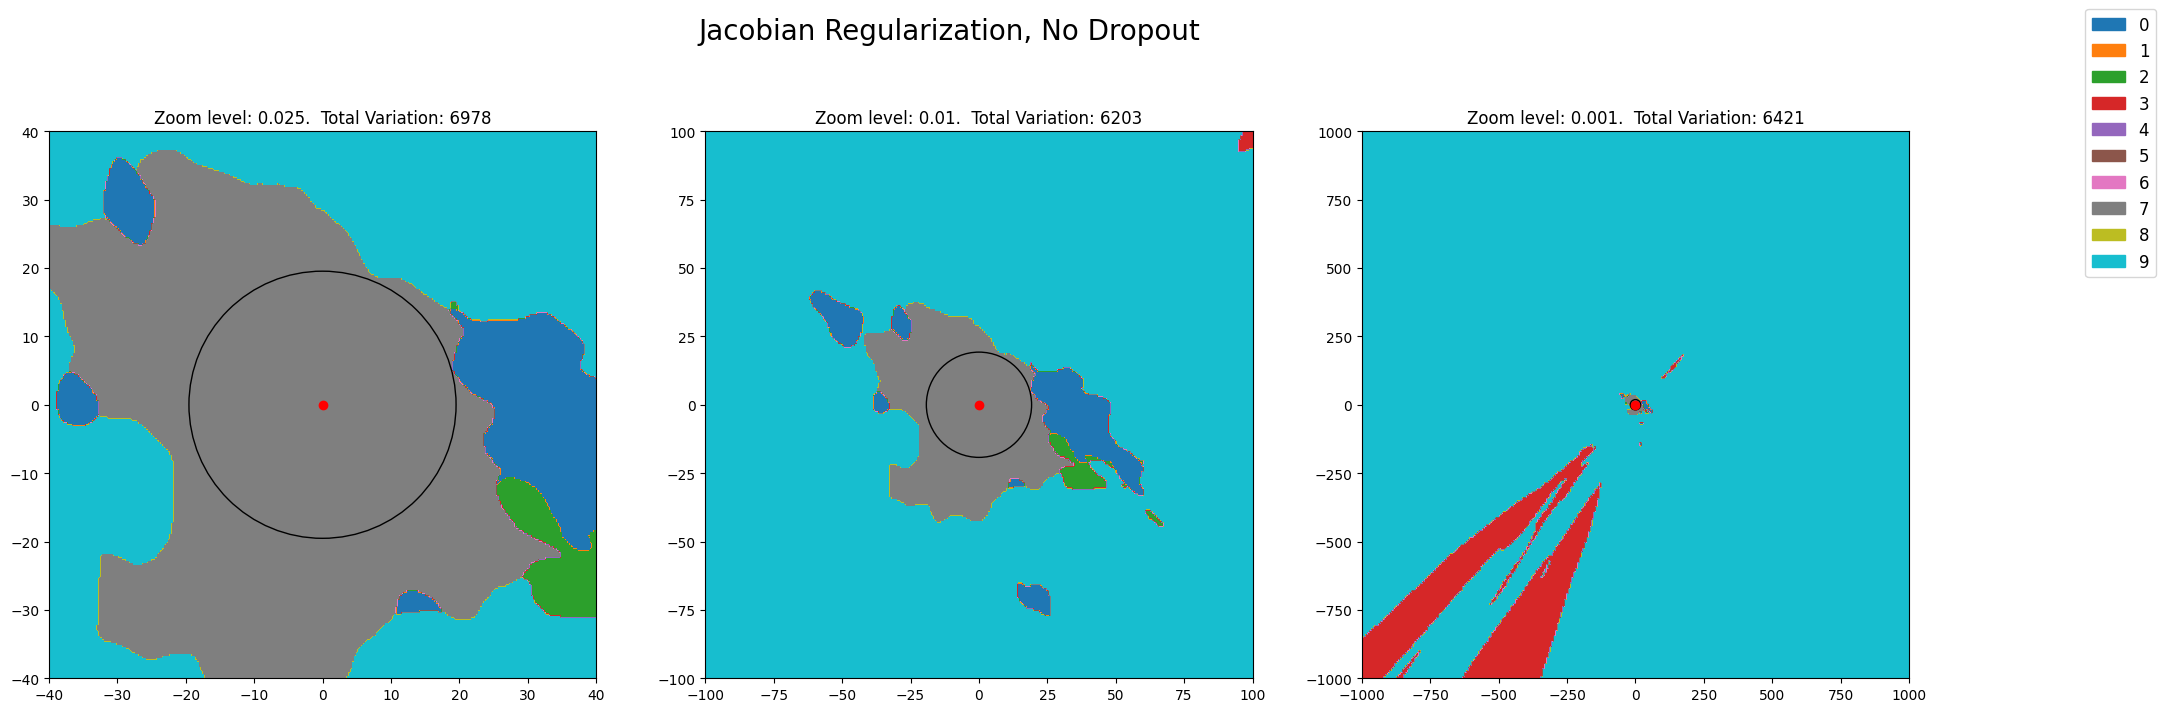

In [26]:
image = get_random_img(test_loader)
v1, v2 = generate_random_vectors(image)
plot_and_print_img(
    image,
    models["model_jacobi_no_dropout_0"].model,
    device,
    "jacobian regularization, no dropout",
)
plot_decision_boundary(
    models["model_jacobi_no_dropout_0"].model,
    image,
    v1,
    v2,
    device,
    title="Jacobian Regularization, No Dropout",
)

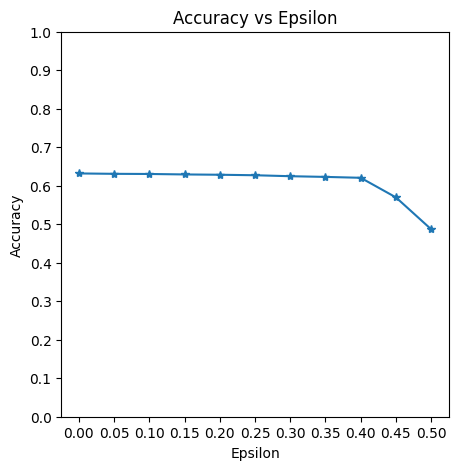

In [27]:
plot_fgsm(models["model_jacobi_no_dropout_0"].model, device, test_loader)

### SVB Regularization

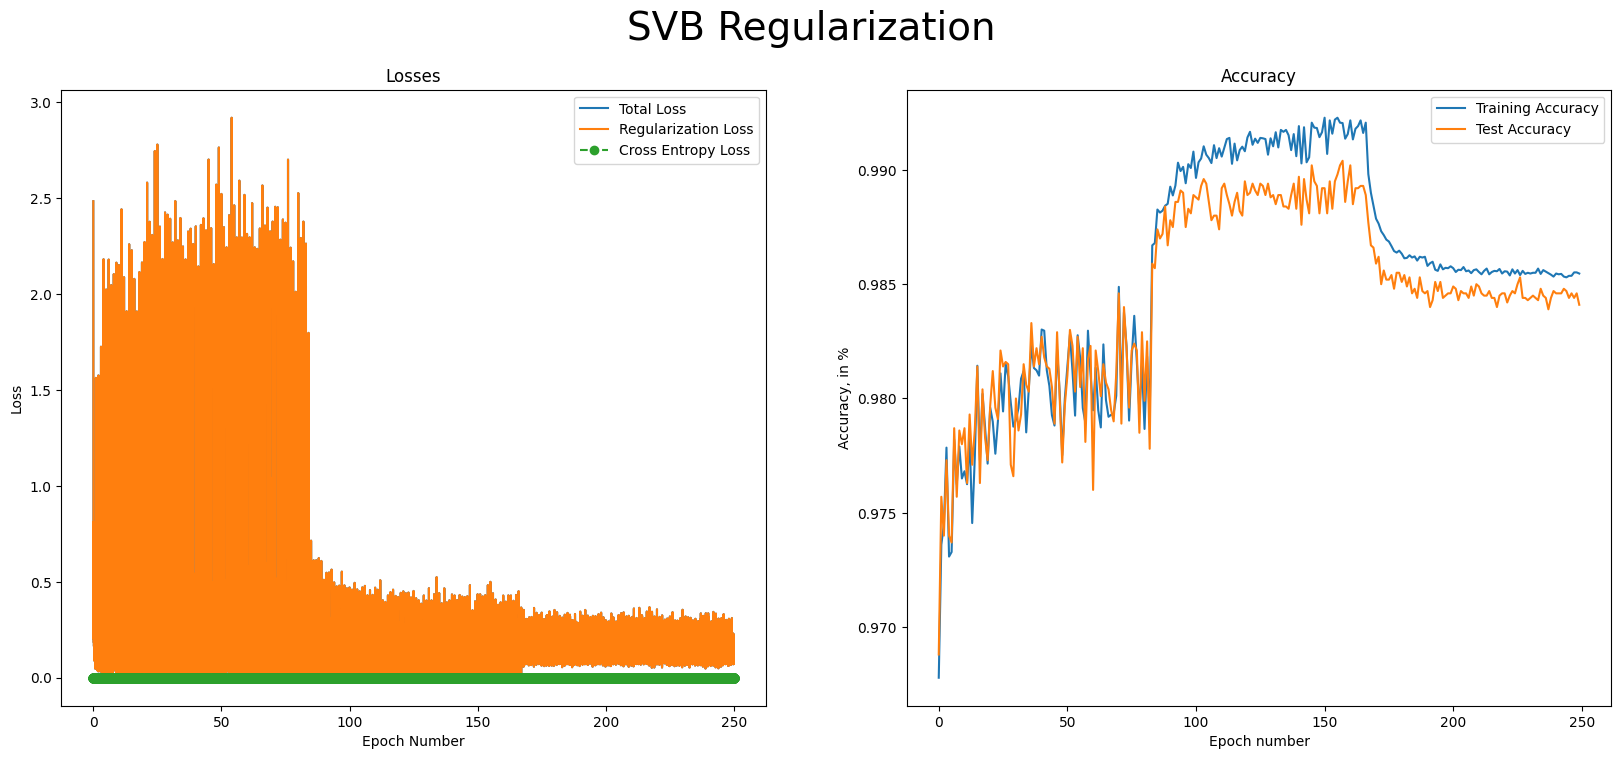

In [28]:
plot_reg_results(models, model_name="model_svb_0", title="SVB Regularization")

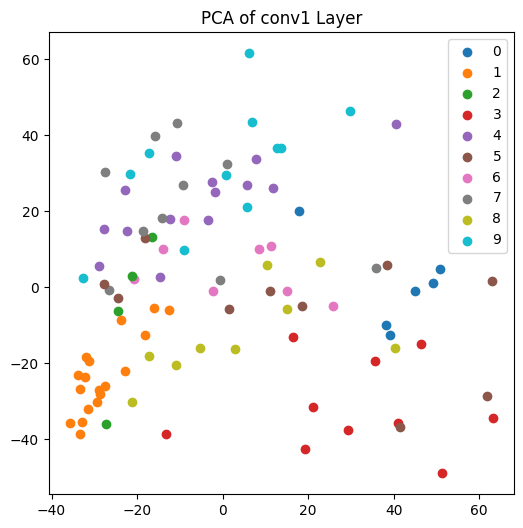

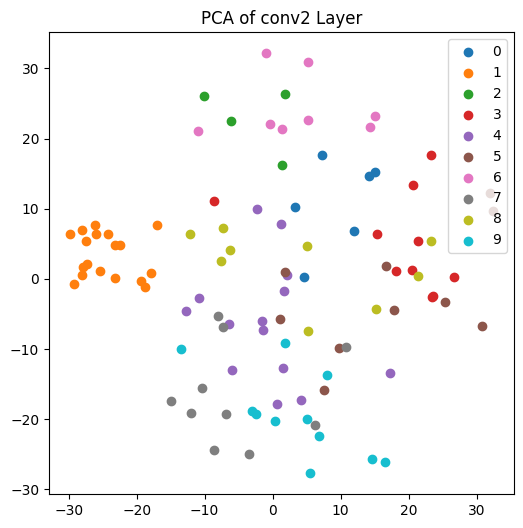

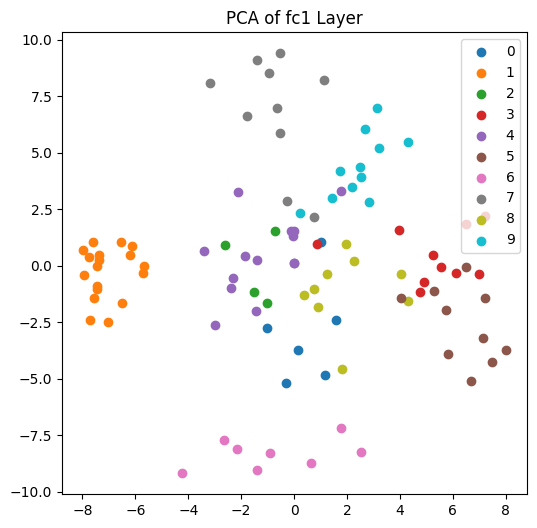

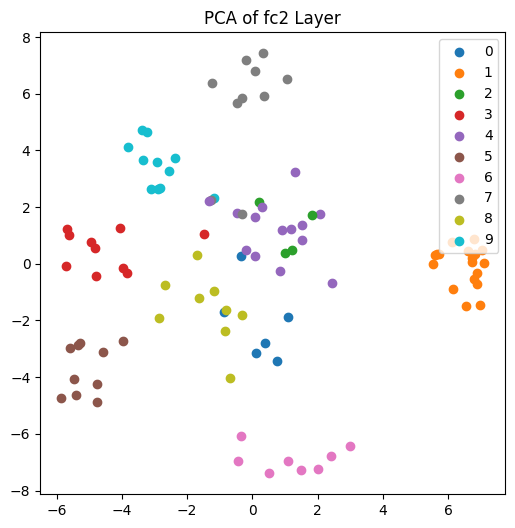

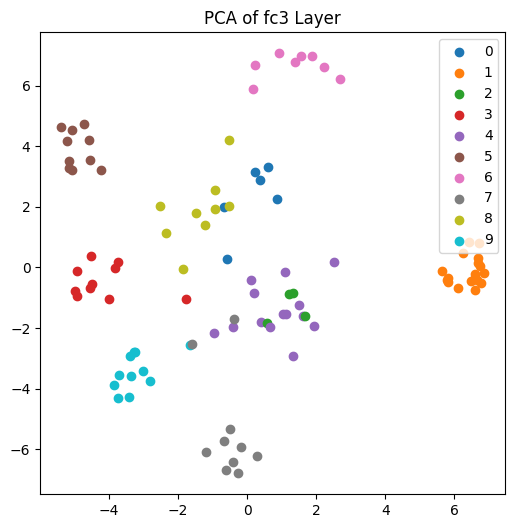

In [29]:
plot_activations_pca(models["model_svb_0"].model, train_loader, device)

Prediction with svb regularization: 9


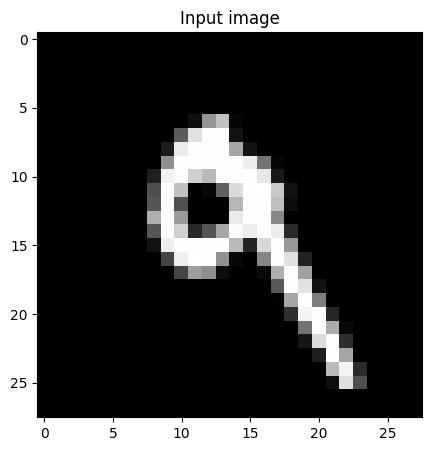

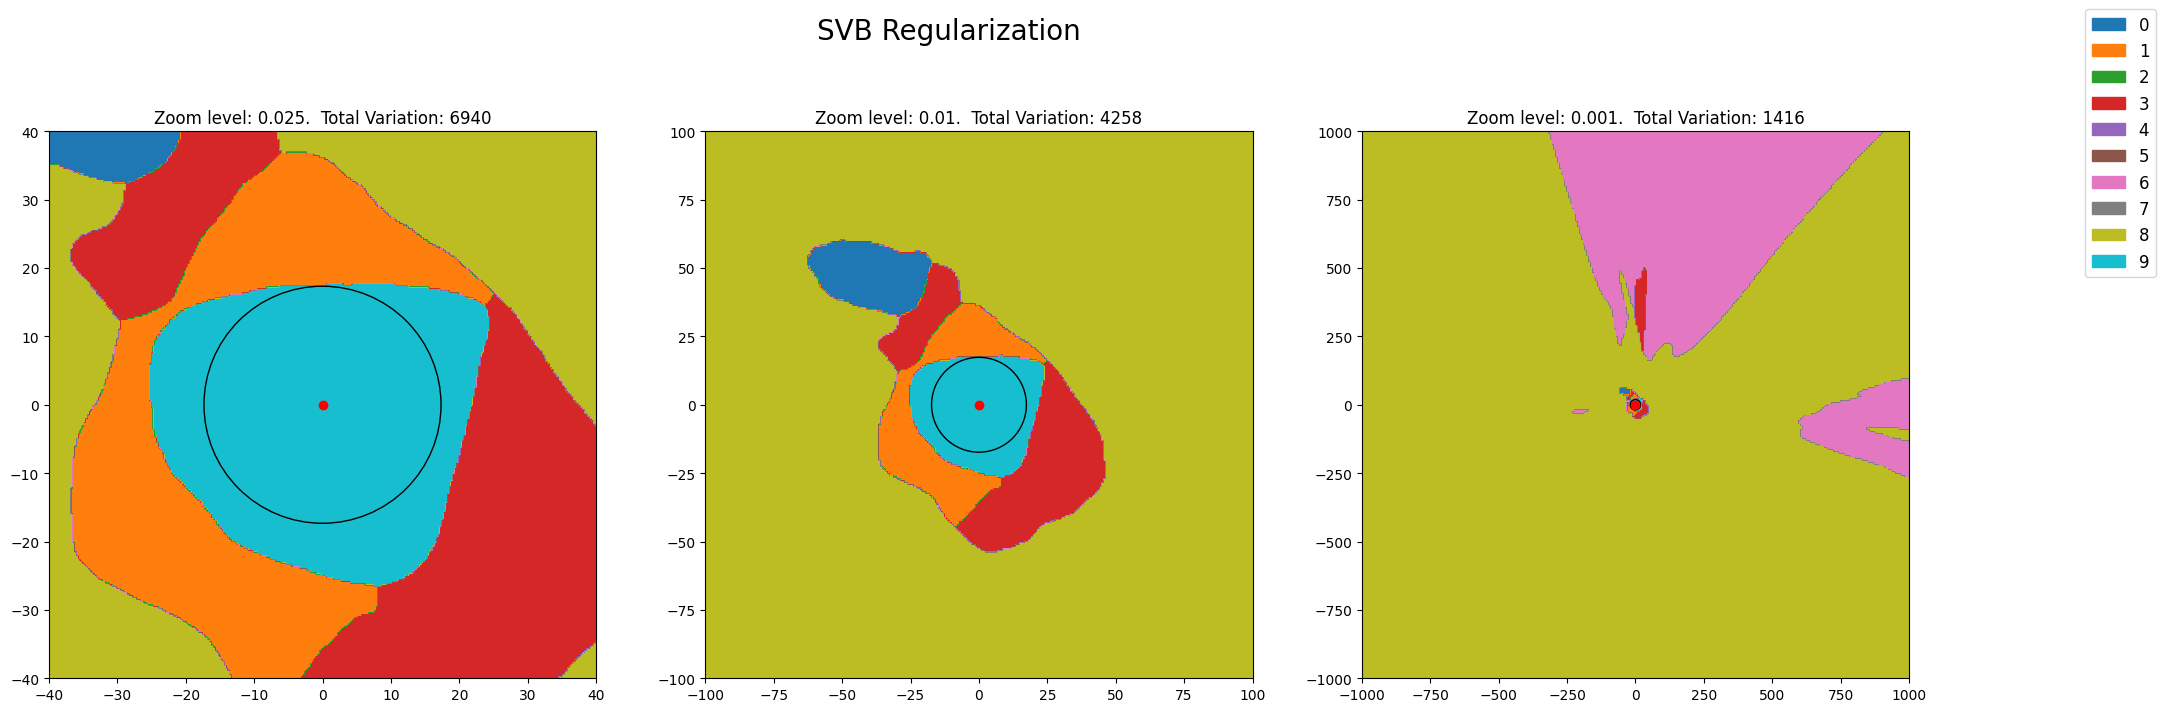

In [30]:
image = get_random_img(test_loader)
v1, v2 = generate_random_vectors(image)
plot_and_print_img(image, models["model_svb_0"].model, device, "svb regularization")
plot_decision_boundary(
    models["model_svb_0"].model, image, v1, v2, device, title="SVB Regularization"
)

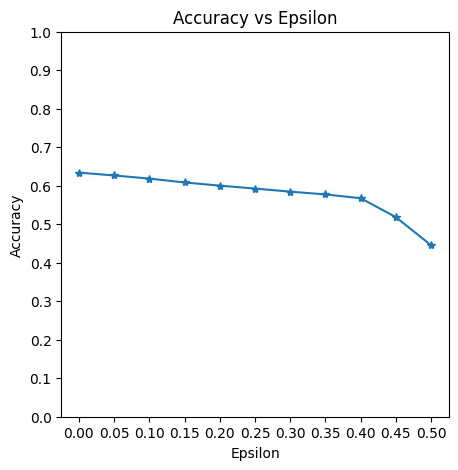

In [31]:
plot_fgsm(models["model_svb_0"].model, device, test_loader)

### SVB Regularization, No Dropout

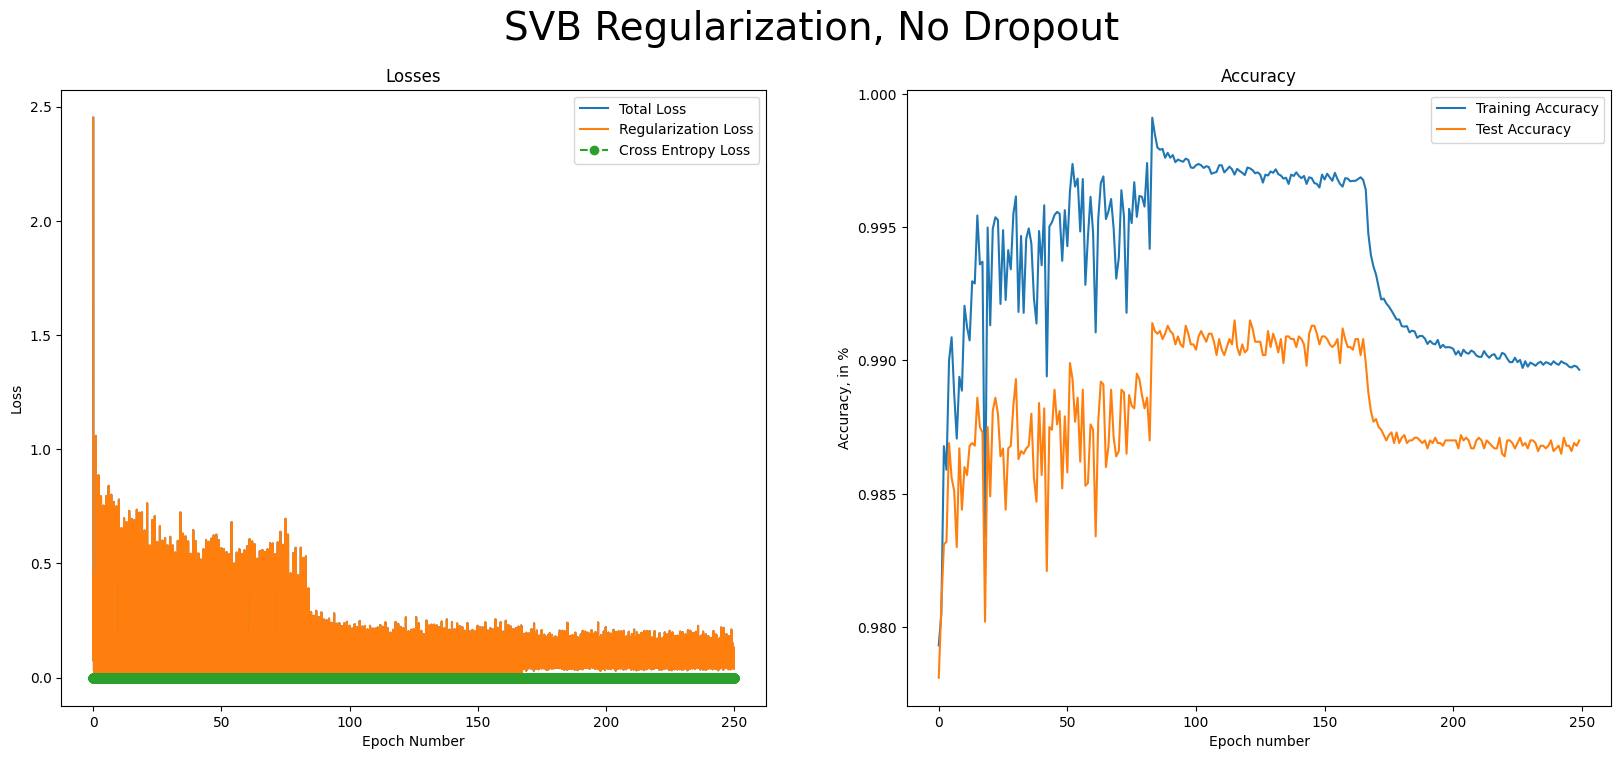

In [32]:
plot_reg_results(
    models, model_name="model_svb_no_dropout_0", title="SVB Regularization, No Dropout"
)

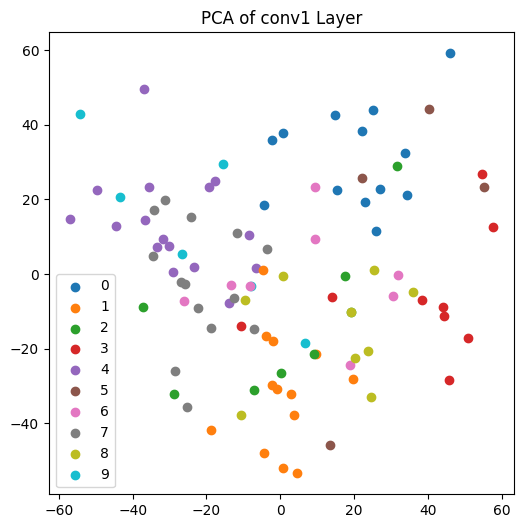

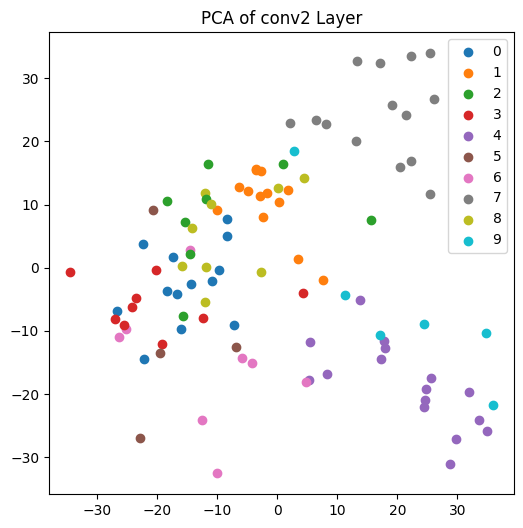

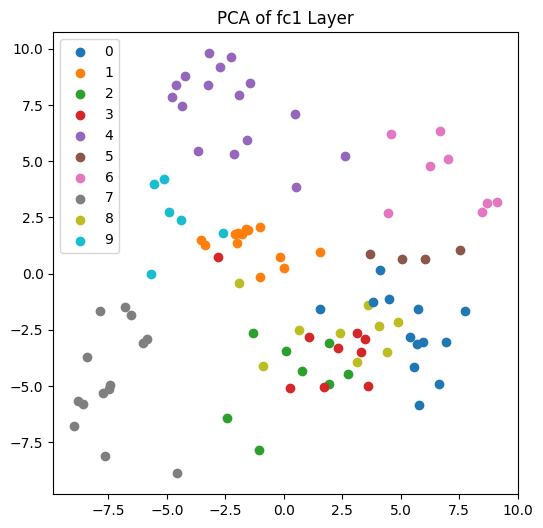

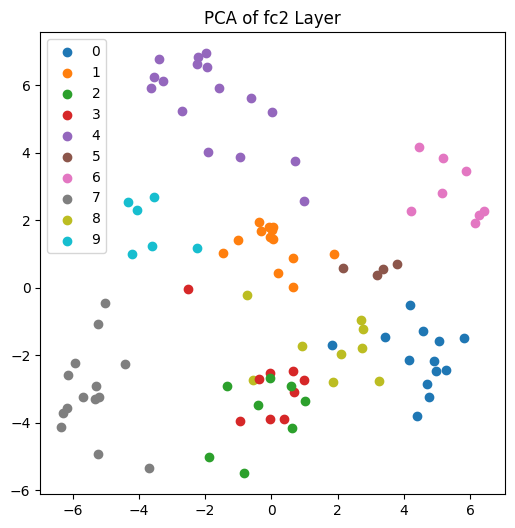

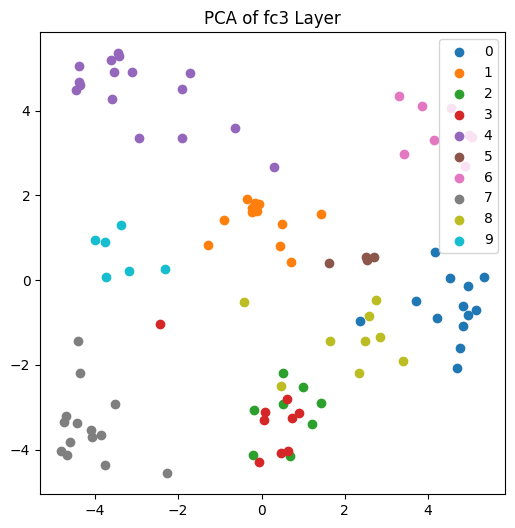

In [33]:
plot_activations_pca(models["model_svb_no_dropout_0"].model, train_loader, device)

Prediction with svb regularization, no dropout: 7


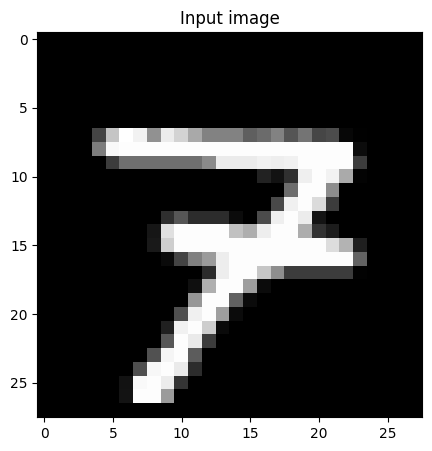

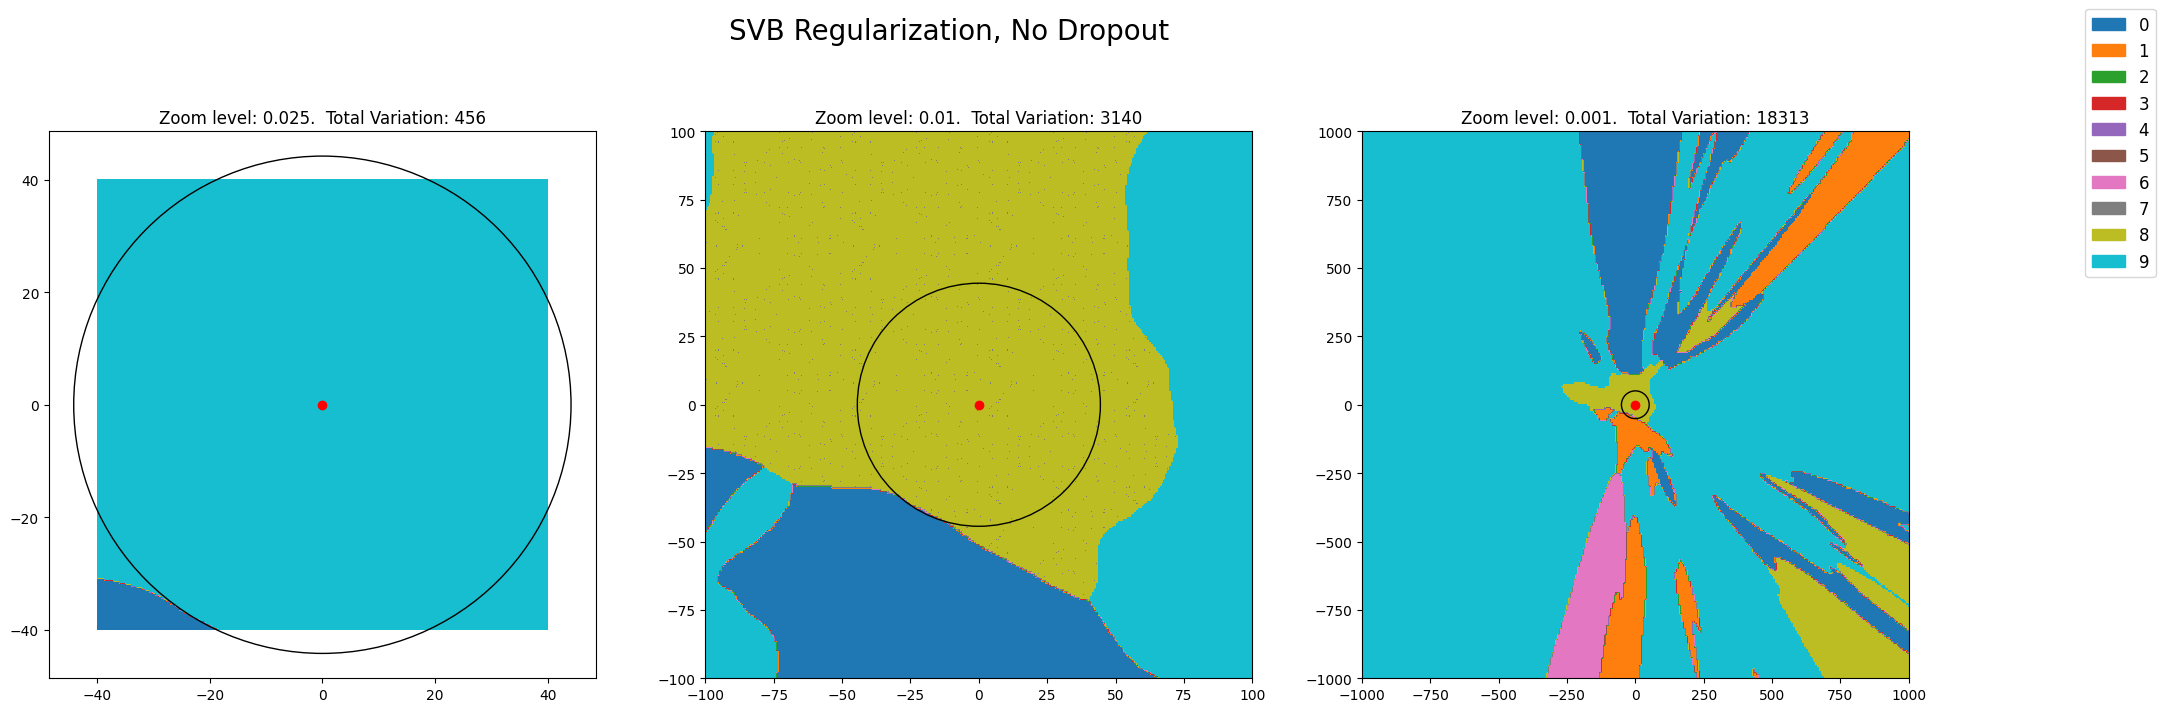

In [34]:
image = get_random_img(test_loader)
v1, v2 = generate_random_vectors(image)
plot_and_print_img(
    image,
    models["model_svb_no_dropout_0"].model,
    device,
    "svb regularization, no dropout",
)
plot_decision_boundary(
    models["model_svb_no_dropout_0"].model,
    image,
    v1,
    v2,
    device,
    title="SVB Regularization, No Dropout",
)

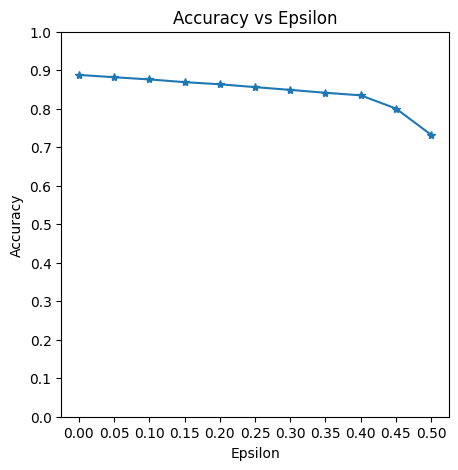

In [35]:
plot_fgsm(models["model_svb_no_dropout_0"].model, device, test_loader)

### Jacobian and SVB Regularization

In [ ]:
plot_reg_results(
    models, model_name="model_jacobian_and_svb_0", title="Jacobian and SVB Regularization"
)

In [ ]:
plot_activations_pca(models["model_jacobian_and_svb_0"].model, train_loader, device)

In [ ]:
image = get_random_img(test_loader)
v1, v2 = generate_random_vectors(image)
plot_and_print_img(
    image,
    models["model_jacobian_and_svb_0"].model,
    device,
    "jacobian and svb regularization",
)
plot_decision_boundary(
    models["model_jacobian_and_svb_0"].model,
    image,
    v1,
    v2,
    device,
    title="Jacobian and SVB Regularization",
)

In [ ]:
plot_fgsm(models["model_jacobian_and_svb_0"].model, device, test_loader)

### All Regularizations

Jacobian, SVB and L2 Regularization, with Dropout.

In [ ]:
plot_reg_results(
    models, model_name="model_all_0", title="Jacobian, SVB and L2 Regularization"
)

In [ ]:
plot_activations_pca(models["model_all_0"].model, train_loader, device)

In [ ]:
image = get_random_img(test_loader)
v1, v2 = generate_random_vectors(image)
plot_and_print_img(
    image,
    models["model_all_0"].model,
    device,
    "jacobian, svb and L2 regularization",
)
plot_decision_boundary(
    models["model_all_0"].model,
    image,
    v1,
    v2,
    device,
    title="Jacobian, SVB and L2 Regularization",
)

In [ ]:
plot_fgsm(models["model_all_0"].model, device, test_loader)

### Jacobian and L2 Regularization

In [ ]:
plot_reg_results(
    models, model_name="model_jacobian_and_l2_0", title="Jacobian and L2 Regularization"
)

In [ ]:
plot_activations_pca(models["model_jacobian_and_l2_0"].model, train_loader, device)

In [ ]:
image = get_random_img(test_loader)
v1, v2 = generate_random_vectors(image)
plot_and_print_img(
    image,
    models["model_jacobian_and_l2_0"].model,
    device,
    "jacobian and L2 regularization",
)
plot_decision_boundary(
    models["model_jacobian_and_l2_0"].model,
    image,
    v1,
    v2,
    device,
    title="Jacobian and L2 Regularization",
)

In [ ]:
plot_fgsm(models["model_jacobian_and_l2_0"].model, device, test_loader)

### SVB and L2 Regularization

In [ ]:
plot_reg_results(
    models, model_name="model_svb_and_l2_0", title="SVB and L2 Regularization"
)

In [ ]:
plot_activations_pca(models["model_svb_and_l2_0"].model, train_loader, device)

In [ ]:
image = get_random_img(test_loader)
v1, v2 = generate_random_vectors(image)
plot_and_print_img(
    image,
    models["model_svb_and_l2_0"].model,
    device,
    "svb and L2 regularization",
)
plot_decision_boundary(
    models["model_svb_and_l2_0"].model,
    image,
    v1,
    v2,
    device,
    title="SVB and L2 Regularization",
)

In [ ]:
plot_fgsm(models["model_svb_and_l2_0"].model, device, test_loader)

### Comparison Between Models

Prediction with Jacobian regularization: 0


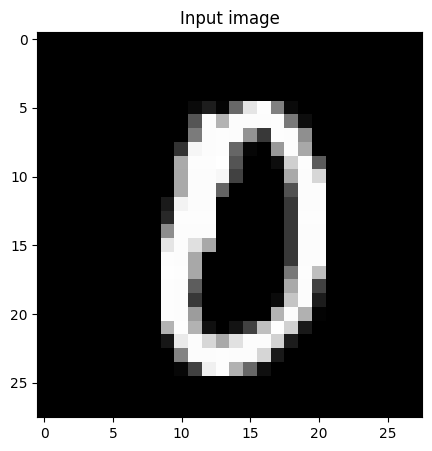

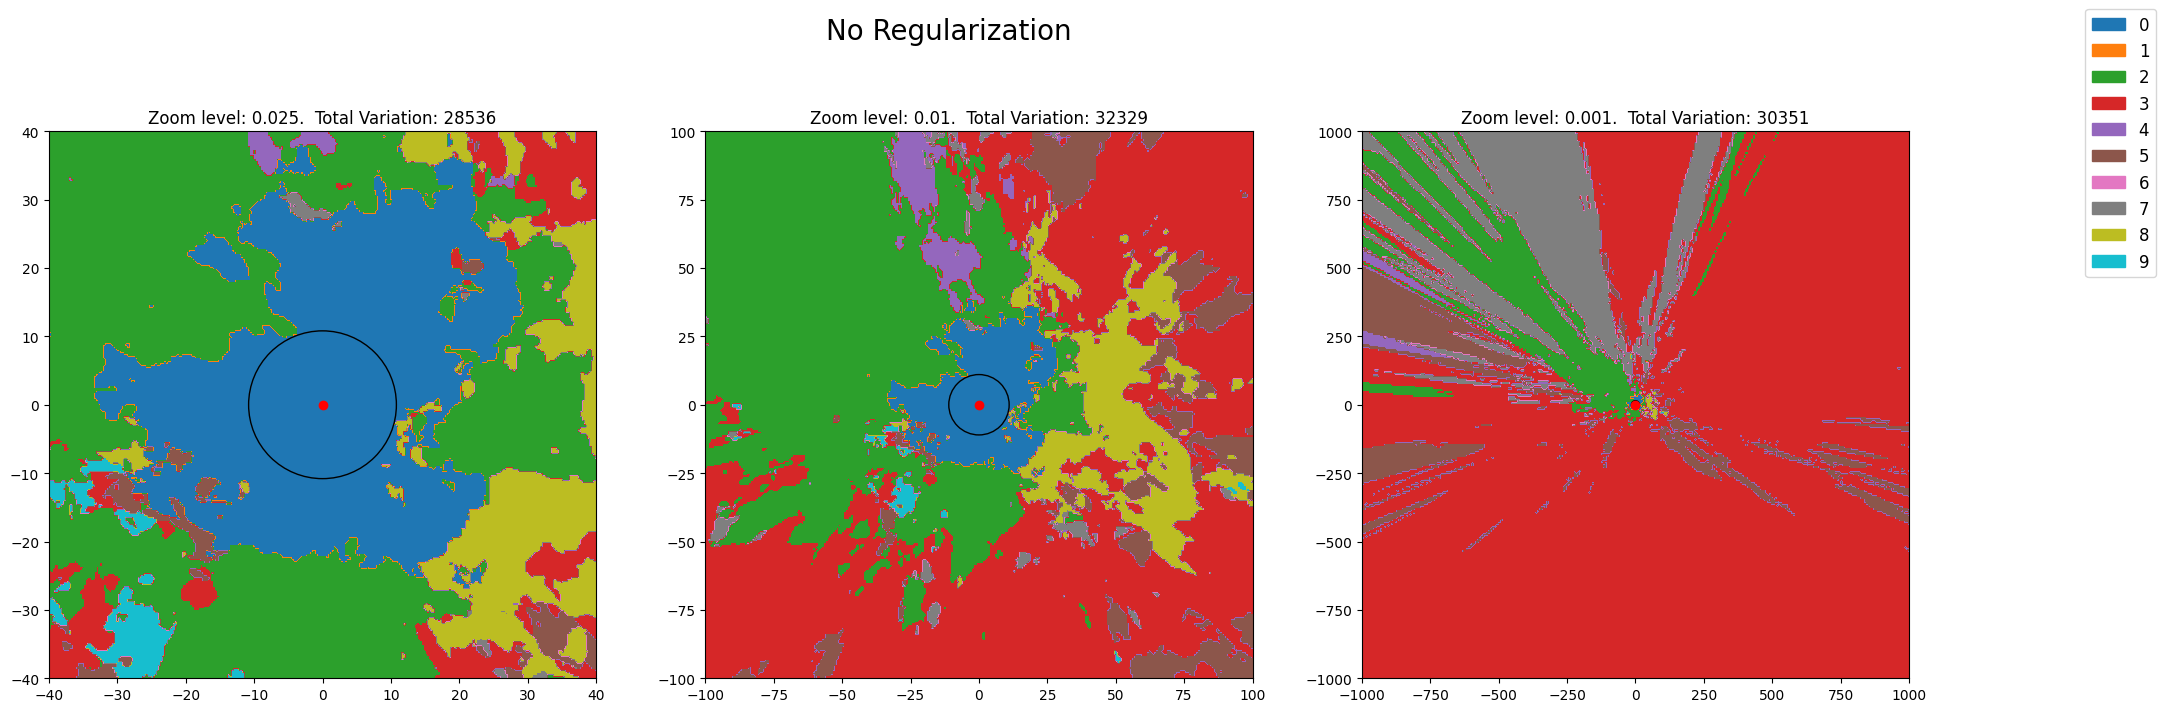

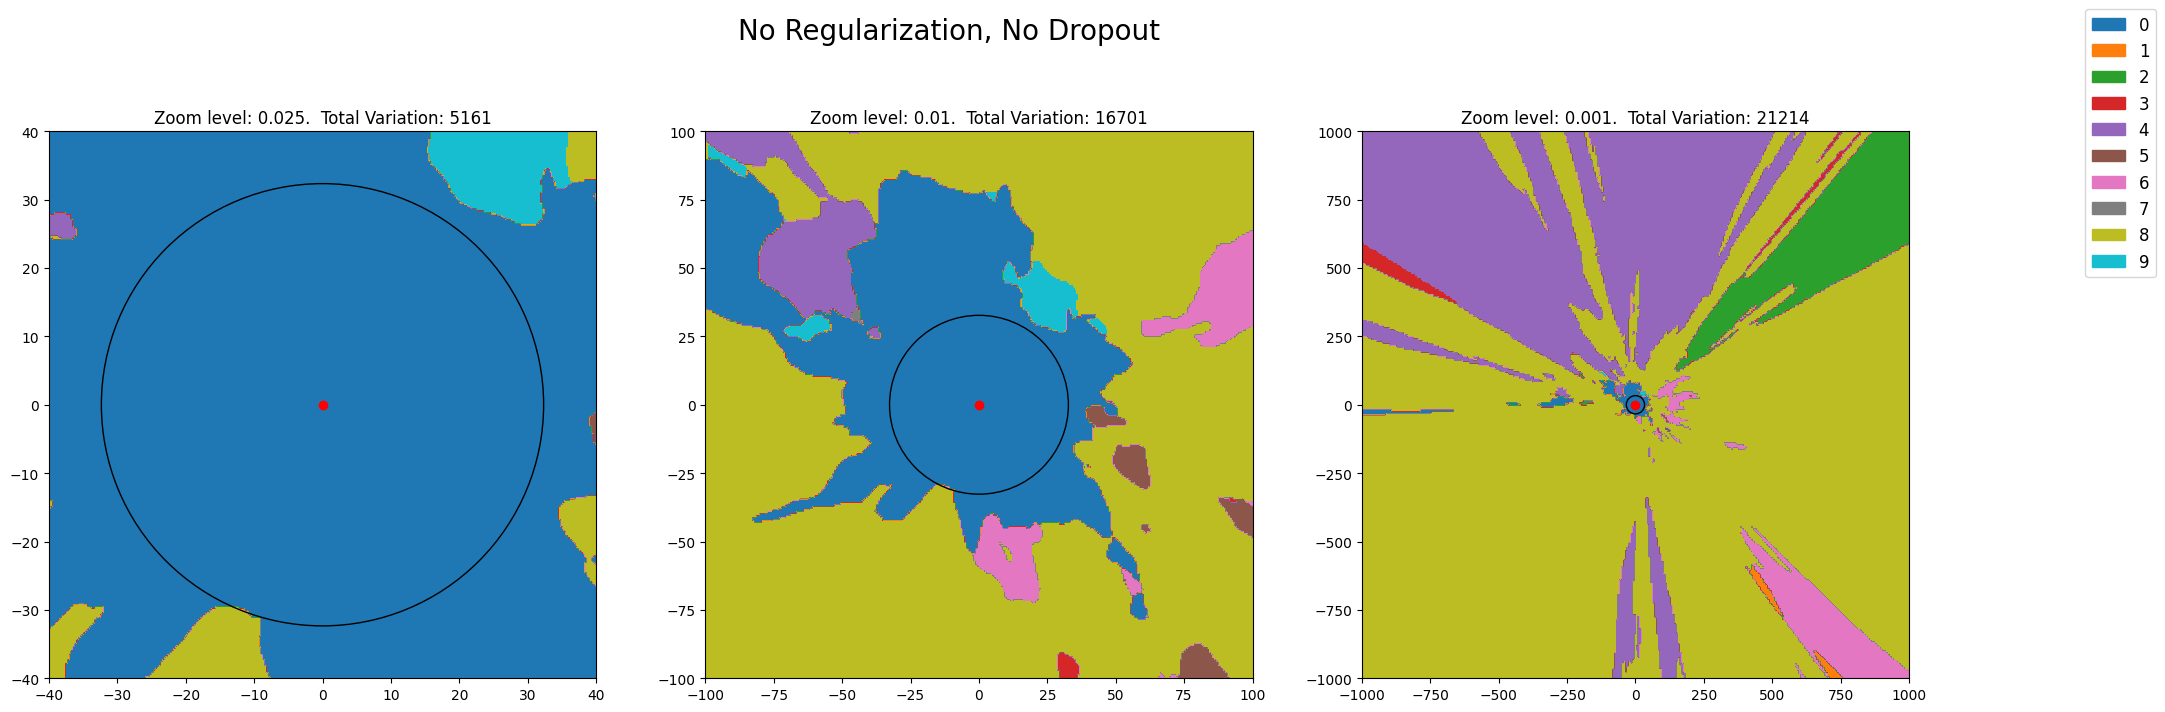

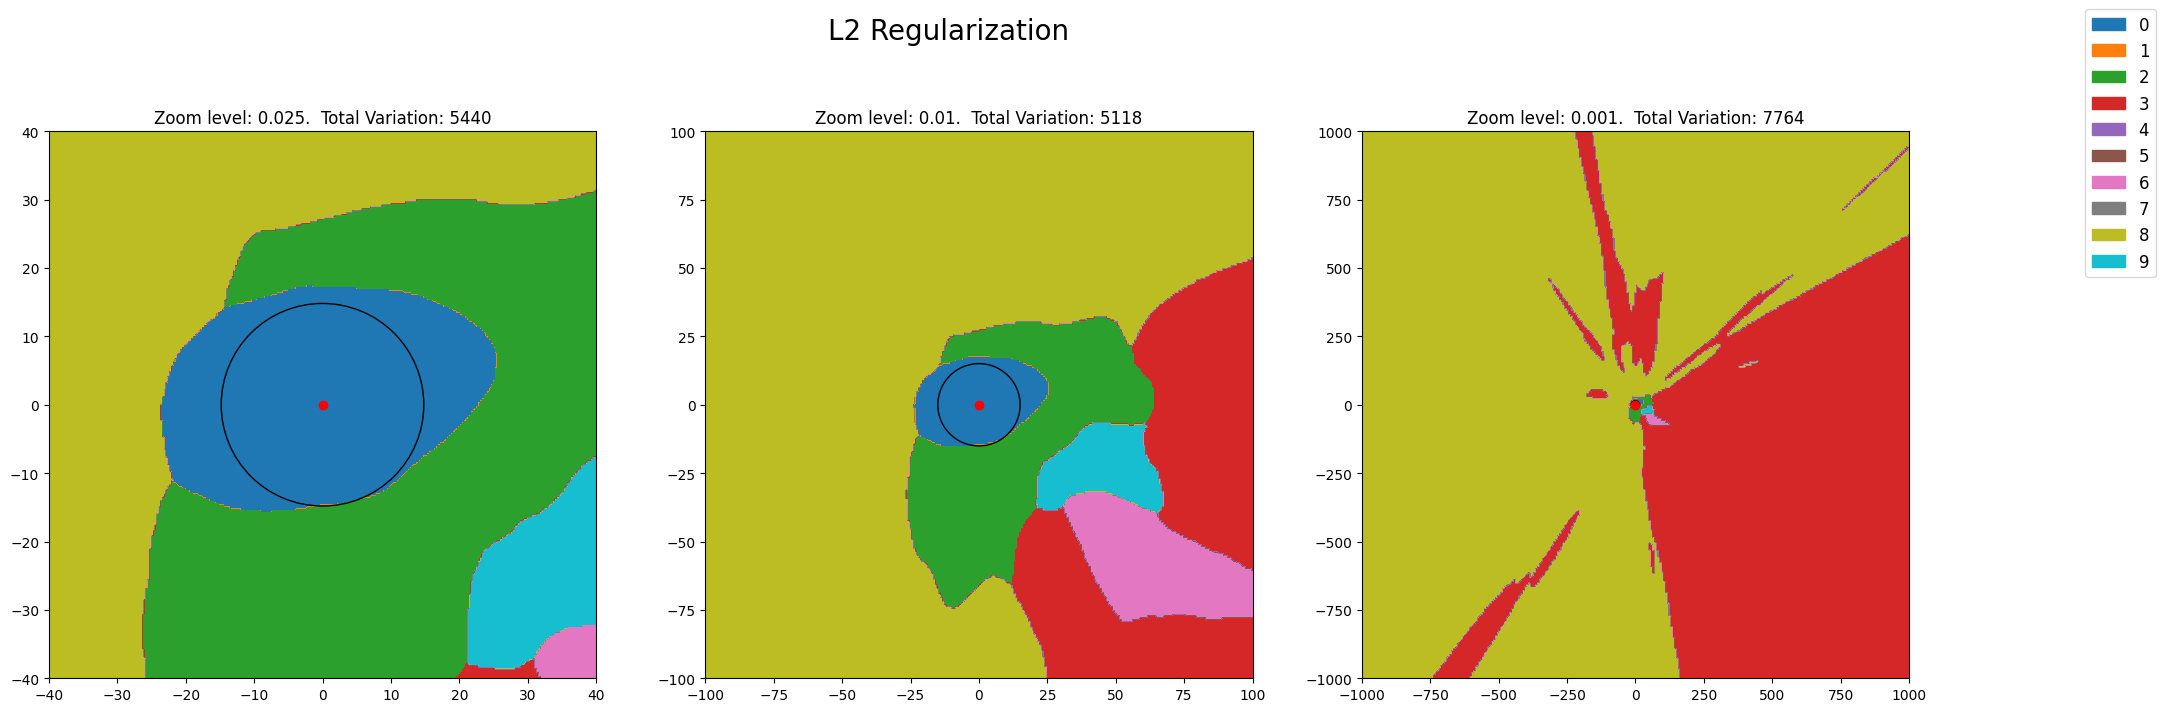

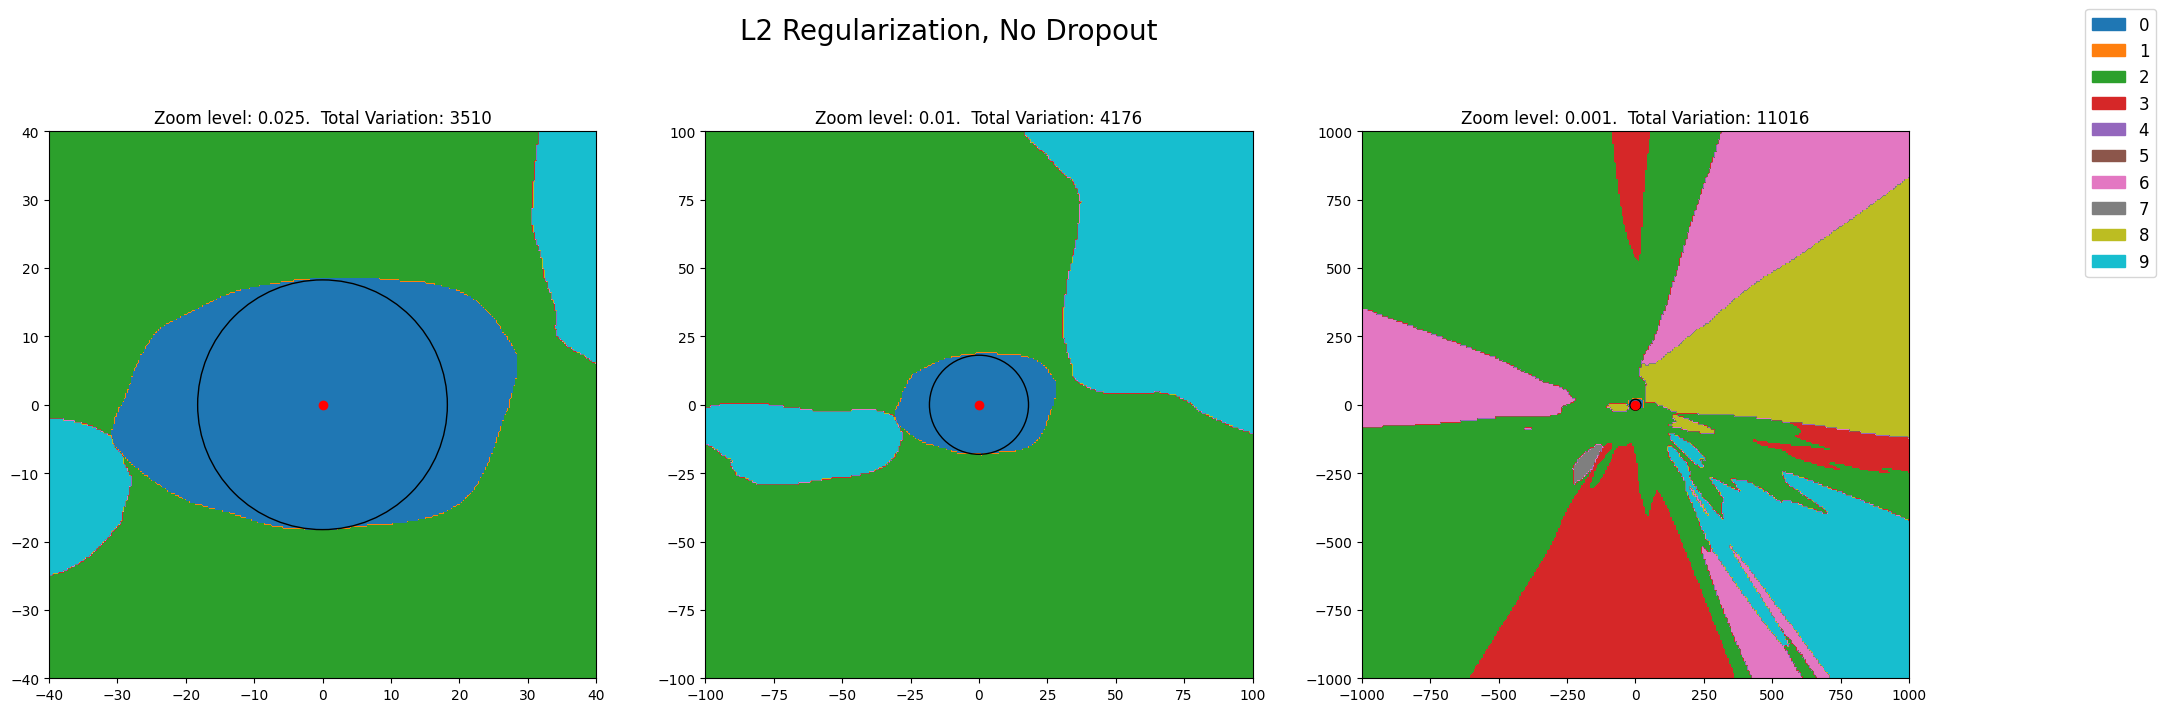

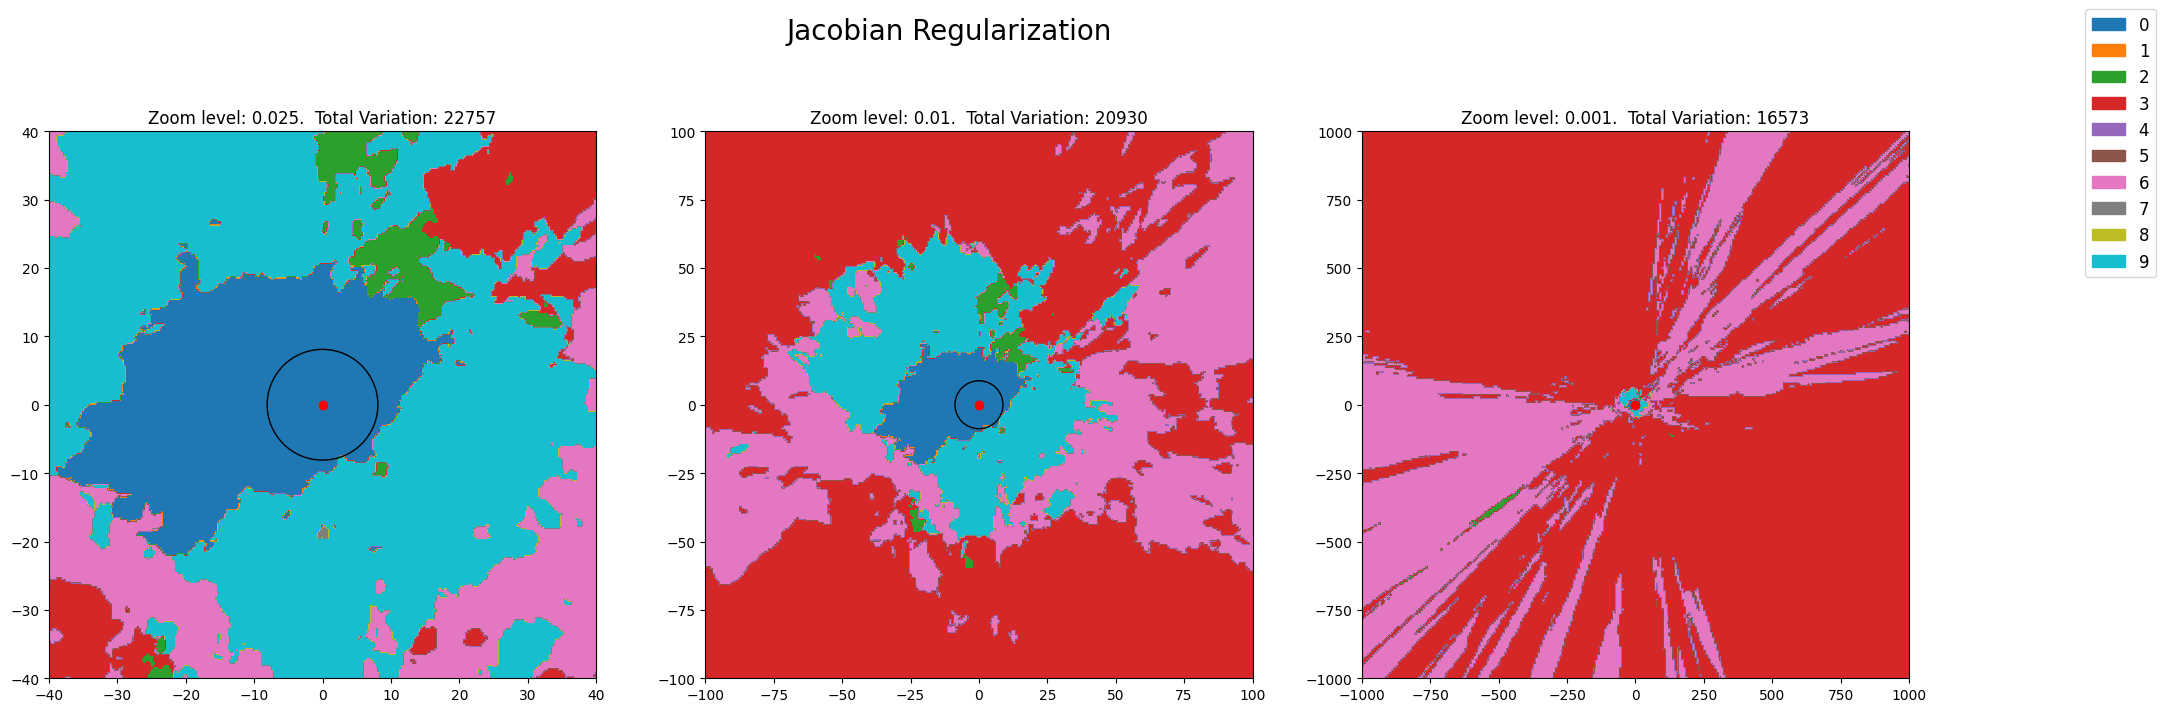

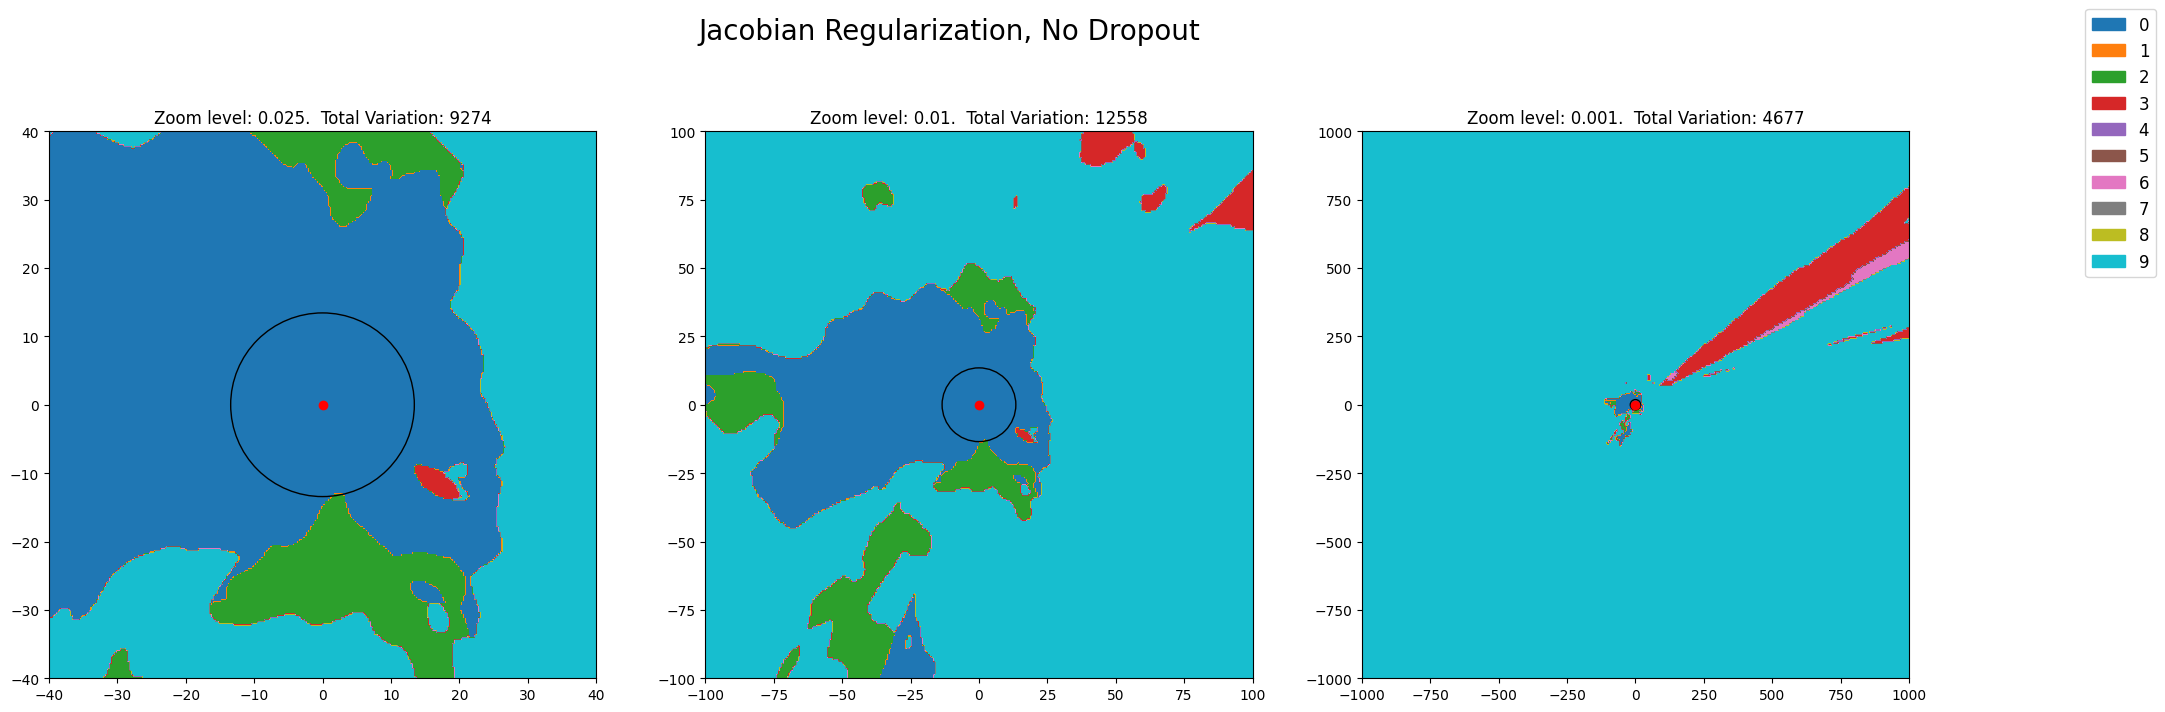

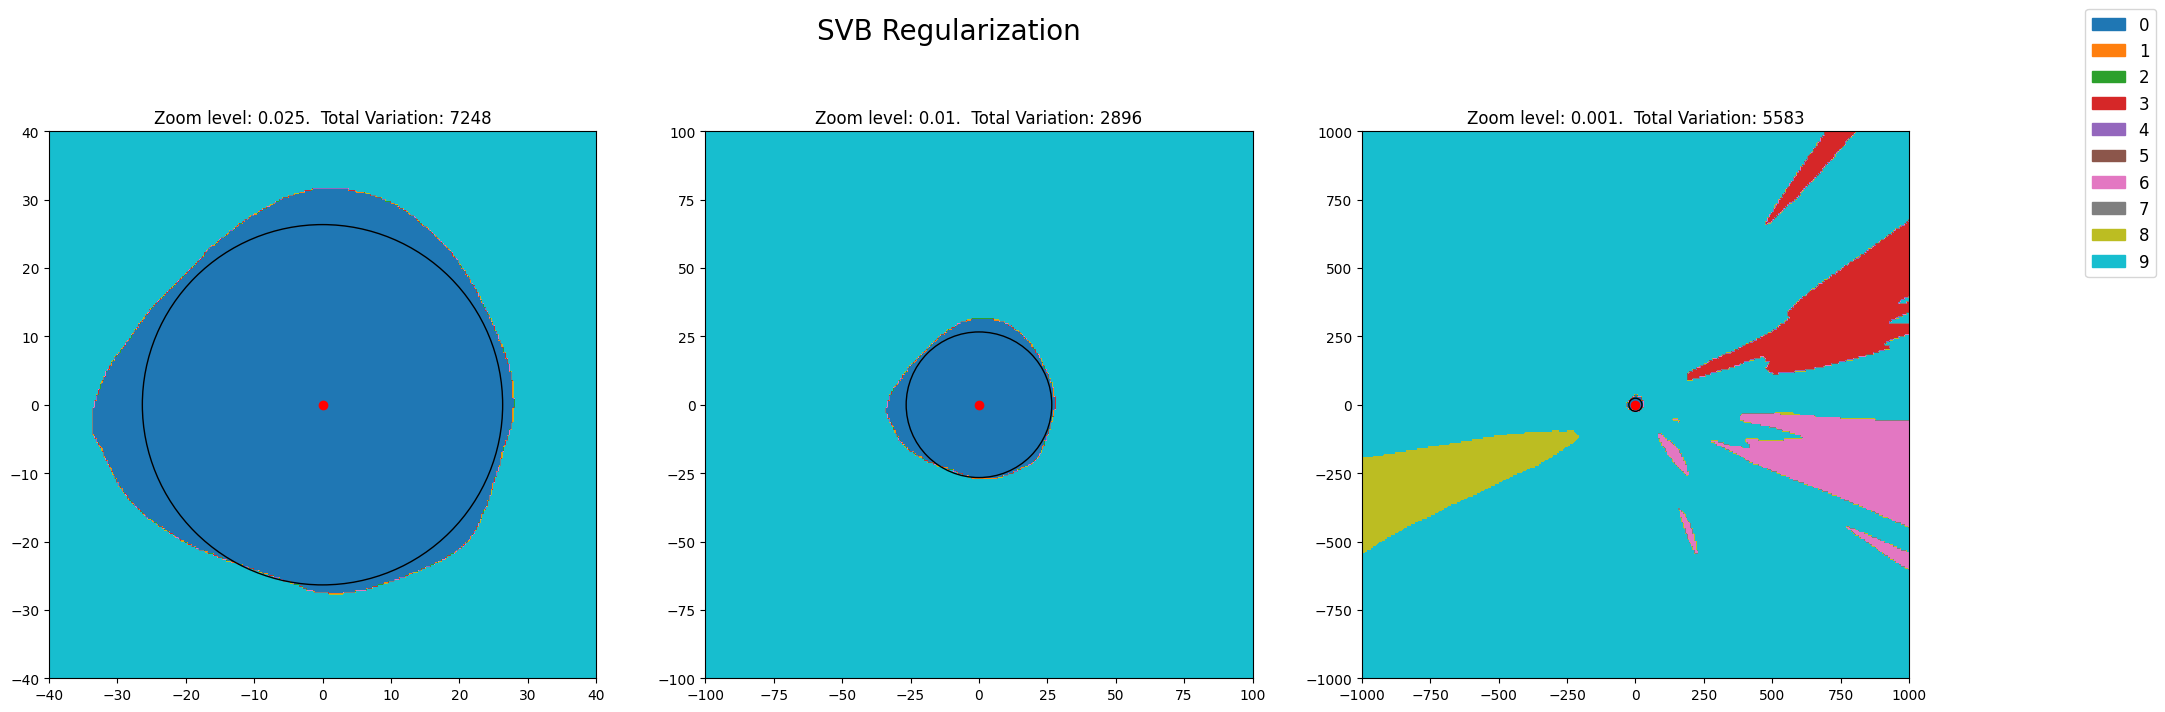

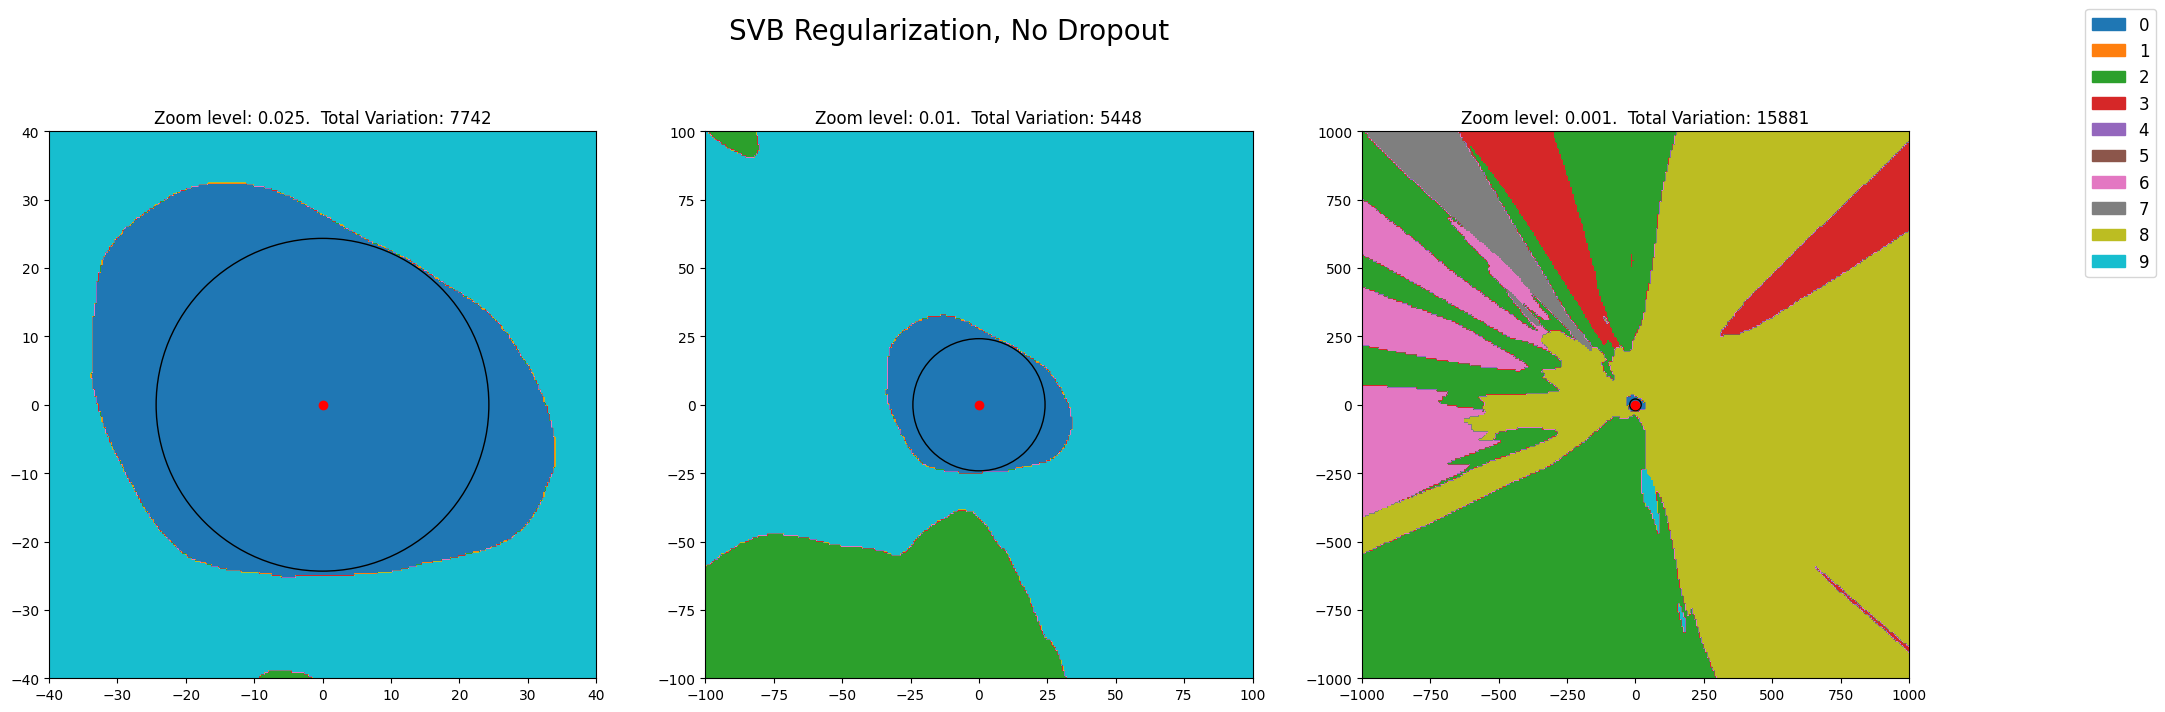

In [36]:
image = get_random_img(test_loader)
v1, v2 = generate_random_vectors(image)
plot_and_print_img(
    image, models["model_jacobi_0"].model, device, "Jacobian regularization"
)
plot_decision_boundary(
    models["model_no_reg_0"].model, image, v1, v2, device, title="No Regularization"
)
plot_decision_boundary(
    models["model_no_reg_no_dropout_0"].model,
    image,
    v1,
    v2,
    device,
    title="No Regularization, No Dropout",
)
plot_decision_boundary(
    models["model_l2_0"].model, image, v1, v2, device, title="L2 Regularization"
)
plot_decision_boundary(
    models["model_l2_no_dropout_0"].model,
    image,
    v1,
    v2,
    device,
    title="L2 Regularization, No Dropout",
)
plot_decision_boundary(
    models["model_jacobi_0"].model,
    image,
    v1,
    v2,
    device,
    title="Jacobian Regularization",
)
plot_decision_boundary(
    models["model_jacobi_no_dropout_0"].model,
    image,
    v1,
    v2,
    device,
    title="Jacobian Regularization, No Dropout",
)
plot_decision_boundary(
    models["model_svb_0"].model, image, v1, v2, device, title="SVB Regularization"
)
plot_decision_boundary(
    models["model_svb_no_dropout_0"].model,
    image,
    v1,
    v2,
    device,
    title="SVB Regularization, No Dropout",
)